# 1. About Project
#### Project Title:
* Evaluation of football player values from Transfermarkt using regression models
#### Project part:
* Exploratory Data Analysis (EDA)
#### Authors:
* Miloš Sirar, IN 3/2020
* Vasilije Zeković, IN 4/2020
#### Subject: 
* Machine Learning 1
#### Professor:
* Tatjana Lončar-Turukalo
#### Assistants:
* Tijana Nosek
* Ivan Lazić

# 2. Exploratory Data Analysis - Part 1

In this section, we'll get to know our data better. We'll clean up unnecessary data, filter out bad values and reorganize the data.

In [23]:
import numpy as np
import pandas as pd
import warnings

In [24]:
appearances = pd.read_csv("baze_podataka/appearances.csv")
club_games = pd.read_csv("baze_podataka/club_games.csv")
clubs = pd.read_csv("baze_podataka/clubs.csv")
competitions = pd.read_csv("baze_podataka/competitions.csv")
game_events = pd.read_csv("baze_podataka/game_events.csv")
game_lineups = pd.read_csv("baze_podataka/game_lineups.csv")
games = pd.read_csv("baze_podataka/games.csv")
player_valuations = pd.read_csv("baze_podataka/player_valuations.csv")
players = pd.read_csv("baze_podataka/players.csv")

In [25]:
players

,player_id,first_name,last_name,name,last_season,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,date_of_birth,sub_position,position,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,agent_name,image_url,url,current_club_domestic_competition_id,current_club_name
0,598,Timo,Hildebrand,Timo Hildebrand,2014,24,timo-hildebrand,Germany,Worms,Germany,1979-04-05,Goalkeeper,Goalkeeper,NaN,NaN,NaN,10000000.0,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/timo-hildebran...,L1,Eintracht Frankfurt
1,670,Martin,Petrov,Martin Petrov,2012,714,martin-petrov,Bulgaria,Vratsa,Bulgaria,1979-01-15,Left Winger,Attack,NaN,NaN,NaN,12000000.0,NaN,IFM,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/martin-petrov/...,ES1,RCD Espanyol Barcelona
2,1323,Martin,Amedick,Martin Amedick,2012,24,martin-amedick,Germany,Paderborn,Germany,1982-09-06,Centre-Back,Defender,NaN,NaN,NaN,2750000.0,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/martin-amedick...,L1,Eintracht Frankfurt
3,3195,Jermaine,Pennant,Jermaine Pennant,2013,512,jermaine-pennant,England,Nottingham,England,1983-01-15,Right Winger,Attack,right,173.0,NaN,10500000.0,NaN,Andrew Sky,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/jermaine-penna...,GB1,Stoke City
4,3259,Damien,Duff,Damien Duff,2013,931,damien-duff,Ireland,Ballyboden,Ireland,1979-03-02,Right Midfield,Midfield,left,177.0,NaN,17000000.0,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/damien-duff/pr...,GB1,Fulham FC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30297,371851,Jaka,Bijol,Jaka Bijol,2023,410,jaka-bijol,Slovenia,Vuzenica,Slovenia,1999-02-05,Centre-Back,Defender,right,190.0,10000000.0,10000000.0,2027-06-30 00:00:00,MSC GROUP,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/jaka-bijol/pro...,IT1,Udinese Calcio
30298,537171,Semuel,Pizzignacco,Semuel Pizzignacco,2018,410,semuel-pizzignacco,Italy,Monfalcone,Italy,2001-09-01,Goalkeeper,Goalkeeper,right,188.0,325000.0,350000.0,2025-06-30 00:00:00,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/semuel-pizzign...,IT1,Udinese Calcio
30299,586756,Festy,Ebosele,Festy Ebosele,2023,410,festy-ebosele,Ireland,"Enniscorthy, Wexford",Ireland,2002-08-02,Right Midfield,Midfield,right,180.0,4500000.0,4500000.0,2027-06-30 00:00:00,The Kulture Group,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/festy-ebosele/...,IT1,Udinese Calcio
30300,704692,Nicolò,Cocetta,Nicolò Cocetta,2022,410,nicolo-cocetta,Italy,San Daniele del Friuli,Italy,2003-12-19,Centre-Back,Defender,NaN,NaN,75000.0,75000.0,2023-06-30 00:00:00,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/nicolo-cocetta...,IT1,Udinese Calcio


Increase the maximum number of columns to ensure that all columns are correctly displayed.

In [26]:
pd.set_option('display.max_columns', 100)

We will keep only the players who are currently active and play in the following five leagues. Additionally, we will remove any NA values. We have selected these leagues because they are among the most developed in the world. By focusing exclusively on active players, we ensure the accuracy of the data used to estimate market values.

In [27]:
df_players = players

df_players = df_players.loc[(df_players["current_club_domestic_competition_id"].isin(["ES1", "GB1", "IT1", "FR1", "L1"])) & (df_players["last_season"].astype(int) == 2023)]

df_players = df_players.drop(df_players[(pd.isna(df_players["foot"])) | (pd.isna(df_players["height_in_cm"]))].index)

print(df_players.count())
df_players

player_id                               2554
first_name                              2439
last_name                               2554
name                                    2554
last_season                             2554
current_club_id                         2554
player_code                             2554
country_of_birth                        2537
city_of_birth                           2537
country_of_citizenship                  2554
date_of_birth                           2554
sub_position                            2554
position                                2554
foot                                    2554
height_in_cm                            2554
market_value_in_eur                     2547
highest_market_value_in_eur             2548
contract_expiration_date                2460
agent_name                              1847
image_url                               2554
url                                     2554
current_club_domestic_competition_id    2554
current_cl

,player_id,first_name,last_name,name,last_season,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,date_of_birth,sub_position,position,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,agent_name,image_url,url,current_club_domestic_competition_id,current_club_name
118,30321,Óscar,Trejo,Óscar Trejo,2023,367,oscar-trejo,Argentina,Santiago del Estero,Argentina,1988-04-26,Attacking Midfield,Midfield,right,180.0,2500000.0,4000000.0,2024-06-30 00:00:00,Eleven Talent Group,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/oscar-trejo/pr...,ES1,Rayo Vallecano
187,45314,Federico,Fazio,Federico Fazio,2023,380,federico-fazio,Argentina,Buenos Aires,Argentina,1987-03-17,Centre-Back,Defender,right,195.0,400000.0,13000000.0,2024-06-30 00:00:00,Team Raiola,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/federico-fazio...,IT1,US Salernitana 1919
229,54846,Fabian,Holland,Fabian Holland,2023,105,fabian-holland,Germany,Berlin,Germany,1990-07-11,Left-Back,Defender,left,172.0,600000.0,1000000.0,2025-06-30 00:00:00,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/fabian-holland...,L1,SV Darmstadt 98
233,55769,Danilo,D'Ambrosio,Danilo D'Ambrosio,2023,2919,danilo-dambrosio,Italy,Napoli,Italy,1988-09-09,Centre-Back,Defender,right,180.0,1500000.0,13000000.0,2024-06-30 00:00:00,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/danilo-dambros...,IT1,AC Monza
239,56809,Alexandre,Oukidja,Alexandre Oukidja,2023,347,alexandre-oukidja,France,Nevers,Algeria,1988-07-19,Goalkeeper,Goalkeeper,right,184.0,500000.0,3000000.0,2025-06-30 00:00:00,SAS ASSIST & GOAL,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/alexandre-ouki...,FR1,FC Metz
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30289,923832,Nathan,Zeze,Nathan Zeze,2023,995,nathan-zeze,France,Nantes,France,2005-06-18,Centre-Back,Defender,right,190.0,400000.0,400000.0,2026-06-30 00:00:00,MYG Invest,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/nathan-zeze/pr...,FR1,FC Nantes
30294,284732,Ramy,Bensebaini,Ramy Bensebaini,2023,16,ramy-bensebaini,Algeria,Constantine,Algeria,1995-04-16,Left-Back,Defender,left,187.0,20000000.0,22000000.0,2027-06-30 00:00:00,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/ramy-bensebain...,L1,Borussia Dortmund
30297,371851,Jaka,Bijol,Jaka Bijol,2023,410,jaka-bijol,Slovenia,Vuzenica,Slovenia,1999-02-05,Centre-Back,Defender,right,190.0,10000000.0,10000000.0,2027-06-30 00:00:00,MSC GROUP,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/jaka-bijol/pro...,IT1,Udinese Calcio
30299,586756,Festy,Ebosele,Festy Ebosele,2023,410,festy-ebosele,Ireland,"Enniscorthy, Wexford",Ireland,2002-08-02,Right Midfield,Midfield,right,180.0,4500000.0,4500000.0,2027-06-30 00:00:00,The Kulture Group,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/festy-ebosele/...,IT1,Udinese Calcio


We will remove any unnecessary attributes. 

* *name* - This is redundant since we already have separate fields for first and last names.
* *player_code* - This is an internal identifier used by Transfermarket.
* *last_season* - This attribute is not critical for our analysis as long as all players share the same last season.
* *country_of_birth* - We will omit this since it is redundant in 99% of cases with the country of citizenship, which we will retain.
* *city_of_birth* - This is unnecessary due to the previous point.
* *market_value_in_eur* - We already possess comprehensive market value data from each valuation date.
* *highest_market_value_in_eur* - This data does not contribute to our model.
* *image_url and url* - These details are irrelevant to our analysis.

In [28]:
NANS = df_players.isnull().sum()
print(NANS)

df_players = df_players.drop(["name", "player_code", "last_season", "country_of_birth", "city_of_birth", "market_value_in_eur", "highest_market_value_in_eur", "image_url", "url"], axis = 1)

df_players

player_id                                 0
first_name                              115
last_name                                 0
name                                      0
last_season                               0
current_club_id                           0
player_code                               0
country_of_birth                         17
city_of_birth                            17
country_of_citizenship                    0
date_of_birth                             0
sub_position                              0
position                                  0
foot                                      0
height_in_cm                              0
market_value_in_eur                       7
highest_market_value_in_eur               6
contract_expiration_date                 94
agent_name                              707
image_url                                 0
url                                       0
current_club_domestic_competition_id      0
current_club_name               

,player_id,first_name,last_name,current_club_id,country_of_citizenship,date_of_birth,sub_position,position,foot,height_in_cm,contract_expiration_date,agent_name,current_club_domestic_competition_id,current_club_name
118,30321,Óscar,Trejo,367,Argentina,1988-04-26,Attacking Midfield,Midfield,right,180.0,2024-06-30 00:00:00,Eleven Talent Group,ES1,Rayo Vallecano
187,45314,Federico,Fazio,380,Argentina,1987-03-17,Centre-Back,Defender,right,195.0,2024-06-30 00:00:00,Team Raiola,IT1,US Salernitana 1919
229,54846,Fabian,Holland,105,Germany,1990-07-11,Left-Back,Defender,left,172.0,2025-06-30 00:00:00,NaN,L1,SV Darmstadt 98
233,55769,Danilo,D'Ambrosio,2919,Italy,1988-09-09,Centre-Back,Defender,right,180.0,2024-06-30 00:00:00,NaN,IT1,AC Monza
239,56809,Alexandre,Oukidja,347,Algeria,1988-07-19,Goalkeeper,Goalkeeper,right,184.0,2025-06-30 00:00:00,SAS ASSIST & GOAL,FR1,FC Metz
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30289,923832,Nathan,Zeze,995,France,2005-06-18,Centre-Back,Defender,right,190.0,2026-06-30 00:00:00,MYG Invest,FR1,FC Nantes
30294,284732,Ramy,Bensebaini,16,Algeria,1995-04-16,Left-Back,Defender,left,187.0,2027-06-30 00:00:00,NaN,L1,Borussia Dortmund
30297,371851,Jaka,Bijol,410,Slovenia,1999-02-05,Centre-Back,Defender,right,190.0,2027-06-30 00:00:00,MSC GROUP,IT1,Udinese Calcio
30299,586756,Festy,Ebosele,410,Ireland,2002-08-02,Right Midfield,Midfield,right,180.0,2027-06-30 00:00:00,The Kulture Group,IT1,Udinese Calcio


**Many attributes from the club data frame are irrelevant to our model.**

In [29]:
df_clubs = clubs
df_clubs
df_clubs = df_clubs.drop(["club_code", "total_market_value", "squad_size", "average_age", "foreigners_number", "foreigners_percentage", "national_team_players", "stadium_name", "stadium_seats", "net_transfer_record", "coach_name", "last_season", "url"], axis = 1)
df_clubs

df_players = pd.merge(df_players, df_clubs, left_on = "current_club_id", right_on = "club_id", how = "inner")

In [30]:
df_players = df_players.drop(["current_club_id", "current_club_name", "club_id", "domestic_competition_id"], axis = 1)
df_players

,player_id,first_name,last_name,country_of_citizenship,date_of_birth,sub_position,position,foot,height_in_cm,contract_expiration_date,agent_name,current_club_domestic_competition_id,name
0,30321,Óscar,Trejo,Argentina,1988-04-26,Attacking Midfield,Midfield,right,180.0,2024-06-30 00:00:00,Eleven Talent Group,ES1,Rayo Vallecano de Madrid S.A.D.
1,311044,Alfonso,Espino,Uruguay,1992-01-05,Left-Back,Defender,left,172.0,2026-06-30 00:00:00,NaN,ES1,Rayo Vallecano de Madrid S.A.D.
2,362086,Isi,Palazón,Spain,1994-12-27,Right Winger,Attack,left,169.0,2028-06-30 00:00:00,JV SPORTS,ES1,Rayo Vallecano de Madrid S.A.D.
3,525578,Pathé,Ciss,Senegal,1994-03-16,Central Midfield,Midfield,right,186.0,2025-06-30 00:00:00,NTS Management,ES1,Rayo Vallecano de Madrid S.A.D.
4,527698,Kike,Pérez,Spain,1997-02-14,Central Midfield,Midfield,left,184.0,2024-06-30 00:00:00,LEADERBROCK,ES1,Rayo Vallecano de Madrid S.A.D.
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2549,27807,Daniele,Padelli,Italy,1985-10-25,Goalkeeper,Goalkeeper,right,191.0,2025-06-30 00:00:00,Assist,IT1,Udinese Calcio
2550,465279,Marco,Ballarini,Italy,2001-03-28,Right Midfield,Midfield,right,186.0,NaN,NaN,IT1,Udinese Calcio
2551,371851,Jaka,Bijol,Slovenia,1999-02-05,Centre-Back,Defender,right,190.0,2027-06-30 00:00:00,MSC GROUP,IT1,Udinese Calcio
2552,586756,Festy,Ebosele,Ireland,2002-08-02,Right Midfield,Midfield,right,180.0,2027-06-30 00:00:00,The Kulture Group,IT1,Udinese Calcio


Just name is not intuitive.

In [31]:
df_players.rename(columns = {"name" : "current_club_name"}, inplace = True)
df_players

,player_id,first_name,last_name,country_of_citizenship,date_of_birth,sub_position,position,foot,height_in_cm,contract_expiration_date,agent_name,current_club_domestic_competition_id,current_club_name
0,30321,Óscar,Trejo,Argentina,1988-04-26,Attacking Midfield,Midfield,right,180.0,2024-06-30 00:00:00,Eleven Talent Group,ES1,Rayo Vallecano de Madrid S.A.D.
1,311044,Alfonso,Espino,Uruguay,1992-01-05,Left-Back,Defender,left,172.0,2026-06-30 00:00:00,NaN,ES1,Rayo Vallecano de Madrid S.A.D.
2,362086,Isi,Palazón,Spain,1994-12-27,Right Winger,Attack,left,169.0,2028-06-30 00:00:00,JV SPORTS,ES1,Rayo Vallecano de Madrid S.A.D.
3,525578,Pathé,Ciss,Senegal,1994-03-16,Central Midfield,Midfield,right,186.0,2025-06-30 00:00:00,NTS Management,ES1,Rayo Vallecano de Madrid S.A.D.
4,527698,Kike,Pérez,Spain,1997-02-14,Central Midfield,Midfield,left,184.0,2024-06-30 00:00:00,LEADERBROCK,ES1,Rayo Vallecano de Madrid S.A.D.
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2549,27807,Daniele,Padelli,Italy,1985-10-25,Goalkeeper,Goalkeeper,right,191.0,2025-06-30 00:00:00,Assist,IT1,Udinese Calcio
2550,465279,Marco,Ballarini,Italy,2001-03-28,Right Midfield,Midfield,right,186.0,NaN,NaN,IT1,Udinese Calcio
2551,371851,Jaka,Bijol,Slovenia,1999-02-05,Centre-Back,Defender,right,190.0,2027-06-30 00:00:00,MSC GROUP,IT1,Udinese Calcio
2552,586756,Festy,Ebosele,Ireland,2002-08-02,Right Midfield,Midfield,right,180.0,2027-06-30 00:00:00,The Kulture Group,IT1,Udinese Calcio


We will remove any unnecessary attributes. 
* *last_season* - This attribute is not critical for our analysis as long as all players share the same last season.
* *datetime* - Date is enough for our purposes.
* *dateweek* - Date is enough for our purposes.
* *n* - The number of valuations on the same day is completely unnecessary.
* *current_club_id* - This data is redudant and irrelevant for the model training.
* *player_club_domestic_competition* - This data is redudant and irrelevant for the model training.

In [32]:
df_player_valuations = player_valuations
df_player_valuations = player_valuations.drop(["last_season", "datetime", "dateweek", "n", "current_club_id", "player_club_domestic_competition_id"], axis = 1)
df_player_valuations

,player_id,date,market_value_in_eur
0,3132,2003-12-09,400000
1,6893,2003-12-15,900000
2,10,2004-10-04,7000000
3,26,2004-10-04,1500000
4,65,2004-10-04,8000000
...,...,...,...
440658,950091,2023-09-21,1000000
440659,968903,2023-09-21,50000
440660,1031590,2023-09-21,50000
440661,1166093,2023-09-21,50000


Renaming attributes for more intuitive naming.

In [33]:
df_all = pd.merge(df_players, df_player_valuations, left_on = 'player_id', right_on = 'player_id', how='inner')

columns = ["date", "player_id", "first_name", "last_name", "date_of_birth", "height_in_cm", "country_of_citizenship", "position", "sub_position", "foot", "current_club_name", "current_club_domestic_competition_id", "contract_expiration_date", "agent_name", "market_value_in_eur"]

df_all = df_all.reindex(columns = columns)
df_all

df_all.rename(columns = {"date" : "valuation_date", "country_of_citizenship" : "citizienship", "current_club_domestic_competition_id" : "current_club_domestic_competition", "market_value_in_eur" : "market_value_on_valuation_date"}, inplace = True)

df_all = df_all.sort_values(by=['player_id', 'valuation_date'])

df_all

,valuation_date,player_id,first_name,last_name,date_of_birth,height_in_cm,citizienship,position,sub_position,foot,current_club_name,current_club_domestic_competition,contract_expiration_date,agent_name,market_value_on_valuation_date
26493,2004-10-04,3333,James,Milner,1986-01-04,175.0,England,Midfield,Central Midfield,right,Brighton and Hove Albion Football Club,GB1,2024-06-30 00:00:00,NaN,7500000
26494,2005-02-01,3333,James,Milner,1986-01-04,175.0,England,Midfield,Central Midfield,right,Brighton and Hove Albion Football Club,GB1,2024-06-30 00:00:00,NaN,5500000
26495,2005-09-01,3333,James,Milner,1986-01-04,175.0,England,Midfield,Central Midfield,right,Brighton and Hove Albion Football Club,GB1,2024-06-30 00:00:00,NaN,6000000
26496,2006-04-17,3333,James,Milner,1986-01-04,175.0,England,Midfield,Central Midfield,right,Brighton and Hove Albion Football Club,GB1,2024-06-30 00:00:00,NaN,4700000
26497,2007-09-01,3333,James,Milner,1986-01-04,175.0,England,Midfield,Central Midfield,right,Brighton and Hove Albion Football Club,GB1,2024-06-30 00:00:00,NaN,8000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33942,2023-07-25,1082850,NaN,Deivid Washington,2005-06-05,187.0,Brazil,Attack,Centre-Forward,right,Chelsea Football Club,GB1,2030-06-30 00:00:00,Bertolucci Sports,4000000
10224,2023-03-27,1108145,Cheick Oumar,Konaté,2004-04-02,173.0,Mali,Defender,Right-Back,right,Clermont Foot 63,FR1,2026-06-30 00:00:00,BLACKSKILL,1000000
10225,2023-06-27,1108145,Cheick Oumar,Konaté,2004-04-02,173.0,Mali,Defender,Right-Back,right,Clermont Foot 63,FR1,2026-06-30 00:00:00,BLACKSKILL,1000000
2110,2023-09-11,1111776,Ibou,Sané,2005-03-28,180.0,Senegal,Attack,Centre-Forward,right,Football Club de Metz,FR1,2028-06-30 00:00:00,NaN,150000


We will remove any unnecessary attributes:
* *name* - The competition code is sufficient for unique identifying.
* *sub_type and type* - Competition grouping is excessive and not useful.
* *country_id* - This is an internal Transfermarkt's identifier and is irrelevant.
* *confederation* - This is redundant and consistent across all selected data, thus irrelevant.
* *url* - This is completely irrelevant.

We will identify all European competitions to more easily check data consistency later.

In [34]:
df_competitions = competitions
df_competitions = df_competitions.drop(["name", "sub_type", "type", "country_id", "confederation", "url"], axis = 1)
df_competitions

def get_european_competitions(competition):
    if competition is np.nan:
        return "EUROPE"
    else:
        return competition

df_competitions["domestic_league_code"] = df_competitions["domestic_league_code"].apply(get_european_competitions)

df_competitions

df_european_competitions = df_competitions.loc[df_competitions["domestic_league_code"] == "EUROPE"]["competition_id"]

european_competitions_id = []

for european_competition in df_european_competitions:
    european_competitions_id.append(european_competition)  

european_competitions_id

['USC', 'EL', 'ELQ', 'ECLQ', 'CL', 'KLUB', 'CLQ']

We will remove any unnecessary attributes:
* *appearance_id* - This is an internal Transfermarkt's identifier and is irrelevant.
* *player_current_club_id* - This data is redundant and irrelevant for model training.
* *game_id* - This is an internal Transfermarkt's identifier and is irrelevant.
* *player_name* - For now, player_id is sufficient for joins among tables later, and the player_name can be obtained from the player data frame.

In [35]:
df_appearances = appearances
df_appearances = df_appearances.drop(["appearance_id", "player_current_club_id", "game_id", "player_name"], axis = 1)
df_appearances

,player_id,player_club_id,date,competition_id,yellow_cards,red_cards,goals,assists,minutes_played
0,38004,853,2012-07-03,CLQ,0,0,2,0,90
1,79232,8841,2012-07-05,ELQ,0,0,0,0,90
2,42792,6251,2012-07-05,ELQ,0,0,0,0,45
3,73333,1274,2012-07-05,ELQ,0,0,0,0,90
4,122011,195,2012-07-05,ELQ,0,0,0,1,90
...,...,...,...,...,...,...,...,...,...
1507346,659813,15,2023-11-30,EL,0,0,0,0,90
1507347,696027,15,2023-11-30,EL,0,0,0,0,2
1507348,7161,15,2023-11-30,EL,0,0,0,0,10
1507349,743395,15,2023-11-30,EL,0,0,0,0,45


Sorting appearances by *player_id* and *date* is much more intuitive.

In [36]:
df_appearances = df_appearances[df_appearances["player_id"].isin(df_all["player_id"])]

df_appearances = df_appearances.sort_values(by=['player_id', 'date'])

df_appearances

,player_id,player_club_id,date,competition_id,yellow_cards,red_cards,goals,assists,minutes_played
5642,3333,281,2012-08-12,GBCS,0,0,0,1,90
11635,3333,281,2012-08-26,GB1,0,0,0,0,76
14288,3333,281,2012-09-01,GB1,0,0,0,0,9
30282,3333,281,2012-10-06,GB1,0,0,1,0,90
33456,3333,281,2012-10-20,GB1,0,1,0,0,23
...,...,...,...,...,...,...,...,...,...
1503387,1108145,3524,2023-11-25,FR1,0,0,0,0,86
1506649,1108145,3524,2023-11-29,FR1,1,0,0,0,68
1461519,1111776,347,2023-08-27,FR1,0,0,0,0,4
1496929,1111776,347,2023-11-05,FR1,0,0,0,0,20


In [37]:
min_date = df_appearances["date"].min()
min_date

'2012-07-09'

Valuations that aren't tied to any player's appearance are not relevant.

In [38]:
df_all = df_all.drop(df_all[df_all["valuation_date"] < min_date].index)
df_all

,valuation_date,player_id,first_name,last_name,date_of_birth,height_in_cm,citizienship,position,sub_position,foot,current_club_name,current_club_domestic_competition,contract_expiration_date,agent_name,market_value_on_valuation_date
26508,2013-01-28,3333,James,Milner,1986-01-04,175.0,England,Midfield,Central Midfield,right,Brighton and Hove Albion Football Club,GB1,2024-06-30 00:00:00,NaN,17000000
26509,2013-07-02,3333,James,Milner,1986-01-04,175.0,England,Midfield,Central Midfield,right,Brighton and Hove Albion Football Club,GB1,2024-06-30 00:00:00,NaN,18000000
26510,2014-01-15,3333,James,Milner,1986-01-04,175.0,England,Midfield,Central Midfield,right,Brighton and Hove Albion Football Club,GB1,2024-06-30 00:00:00,NaN,15000000
26511,2014-08-12,3333,James,Milner,1986-01-04,175.0,England,Midfield,Central Midfield,right,Brighton and Hove Albion Football Club,GB1,2024-06-30 00:00:00,NaN,14000000
26512,2015-02-12,3333,James,Milner,1986-01-04,175.0,England,Midfield,Central Midfield,right,Brighton and Hove Albion Football Club,GB1,2024-06-30 00:00:00,NaN,14000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33942,2023-07-25,1082850,NaN,Deivid Washington,2005-06-05,187.0,Brazil,Attack,Centre-Forward,right,Chelsea Football Club,GB1,2030-06-30 00:00:00,Bertolucci Sports,4000000
10224,2023-03-27,1108145,Cheick Oumar,Konaté,2004-04-02,173.0,Mali,Defender,Right-Back,right,Clermont Foot 63,FR1,2026-06-30 00:00:00,BLACKSKILL,1000000
10225,2023-06-27,1108145,Cheick Oumar,Konaté,2004-04-02,173.0,Mali,Defender,Right-Back,right,Clermont Foot 63,FR1,2026-06-30 00:00:00,BLACKSKILL,1000000
2110,2023-09-11,1111776,Ibou,Sané,2005-03-28,180.0,Senegal,Attack,Centre-Forward,right,Football Club de Metz,FR1,2028-06-30 00:00:00,NaN,150000


The purpose of the following code is to successfully join all data frames into one in a proper manner.

In [ ]:
warnings.filterwarnings('ignore')
# warnings.filterwarnings('default')

i = 0

for _, row in df_all.iterrows():

    print(i)

    games_played_in_domestic_competition = 0
    minutes_played_in_domestic_competition = 0
    goals_in_domestic_competition = 0
    assists_in_domestic_competition = 0
    yellow_cards_in_domestic_competition = 0
    red_cards_in_domestic_competition = 0

    games_played_in_european_competition = 0
    minutes_played_in_european_competition = 0
    goals_in_european_competition = 0
    assists_in_european_competition = 0
    yellow_cards_in_european_competition = 0
    red_cards_in_european_competition = 0

    club_id_on_valuation_date = "x"
    
    i += 1
    if i == 1:
        df_all.loc[_, "games_played_in_domestic_competition_on_valuation_date"] = 0
        df_all.loc[_, "average_minutes_in_domestic_competition_on_valuation_date"] = 0
        df_all.loc[_, "goals_in_domestic_competition_on_valuation_date"] = 0
        df_all.loc[_, "assists_in_domestic_competition_on_valuation_date"] = 0
        df_all.loc[_, "yellow_cards_in_domestic_competition_on_valuation_date"] = 0
        df_all.loc[_, "red_cards_in_domestic_competition_on_valuation_date"] = 0

        df_all.loc[_, "games_played_in_european_competition_on_valuation_date"] = 0
        df_all.loc[_, "average_minutes_in_european_competition_on_valuation_date"] = 0
        df_all.loc[_, "goals_in_european_competition_on_valuation_date"] = 0
        df_all.loc[_, "assists_in_european_competition_on_valuation_date"] = 0
        df_all.loc[_, "yellow_cards_in_european_competition_on_valuation_date"] = 0
        df_all.loc[_, "red_cards_in_european_competition_on_valuation_date"] = 0

        df_a = df_appearances[df_appearances["player_id"] == row["player_id"]]
        df_a = df_a[df_appearances["date"] <= row["valuation_date"]]

        for n, m in df_a.iterrows():
            df_all.loc[_, "player_club_id"] = m["player_club_id"]
            break

        previous_row = row

        continue
    else:
        current_row = row
        if previous_row["player_id"] != current_row["player_id"]:
            df_all.loc[_, "games_played_in_domestic_competition_on_valuation_date"] = 0
            df_all.loc[_, "average_minutes_in_domestic_competition_on_valuation_date"] = 0
            df_all.loc[_, "goals_in_domestic_competition_on_valuation_date"] = 0
            df_all.loc[_, "assists_in_domestic_competition_on_valuation_date"] = 0
            df_all.loc[_, "yellow_cards_in_domestic_competition_on_valuation_date"] = 0
            df_all.loc[_, "red_cards_in_domestic_competition_on_valuation_date"] = 0

            df_all.loc[_, "games_played_in_european_competition_on_valuation_date"] = 0
            df_all.loc[_, "average_minutes_in_european_competition_on_valuation_date"] = 0
            df_all.loc[_, "goals_in_european_competition_on_valuation_date"] = 0
            df_all.loc[_, "assists_in_european_competition_on_valuation_date"] = 0
            df_all.loc[_, "yellow_cards_in_european_competition_on_valuation_date"] = 0
            df_all.loc[_, "red_cards_in_european_competition_on_valuation_date"] = 0

            df_a = df_appearances[df_appearances["player_id"] == row["player_id"]]
            df_a = df_a[df_appearances["date"] <= row["valuation_date"]]

            for f, g in df_a.iterrows():
                df_all.loc[_, "player_club_id"] = g["player_club_id"]
                break

            previous_row = current_row

            continue

    df_new = df_appearances[df_appearances["player_id"] == current_row["player_id"]]
    df_new = df_new[df_appearances["date"] <= current_row["valuation_date"]]
    df_new = df_new[df_appearances["date"] > previous_row["valuation_date"]]

    for e, j in df_new.iterrows():
        club_id_on_valuation_date = j["player_club_id"]
        if j["competition_id"] in european_competitions_id:
            if j["minutes_played"] > 0:
                games_played_in_european_competition += 1
                minutes_played_in_european_competition += j["minutes_played"]
                goals_in_european_competition += j["goals"]
                assists_in_european_competition += j["assists"]
                yellow_cards_in_european_competition += j["yellow_cards"]
                red_cards_in_european_competition += j["red_cards"]
        else:
            if j["minutes_played"] > 0:
                games_played_in_domestic_competition += 1
                minutes_played_in_domestic_competition += j["minutes_played"]
                goals_in_domestic_competition += j["goals"]
                assists_in_domestic_competition += j["assists"]
                yellow_cards_in_domestic_competition += j["yellow_cards"]
                red_cards_in_domestic_competition += j["red_cards"]

    df_all.loc[_, "games_played_in_domestic_competition_on_valuation_date"] = games_played_in_domestic_competition

    if games_played_in_domestic_competition != 0:
        df_all.loc[_, "average_minutes_in_domestic_competition_on_valuation_date"] = minutes_played_in_domestic_competition / games_played_in_domestic_competition
    else:
        df_all.loc[_, "average_minutes_in_domestic_competition_on_valuation_date"] = 0

    df_all.loc[_, "goals_in_domestic_competition_on_valuation_date"] = goals_in_domestic_competition
    df_all.loc[_, "assists_in_domestic_competition_on_valuation_date"] = assists_in_domestic_competition
    df_all.loc[_, "yellow_cards_in_domestic_competition_on_valuation_date"] = yellow_cards_in_domestic_competition
    df_all.loc[_, "red_cards_in_domestic_competition_on_valuation_date"] = red_cards_in_domestic_competition

    df_all.loc[_, "games_played_in_european_competition_on_valuation_date"] = games_played_in_european_competition

    if games_played_in_european_competition != 0:
        df_all.loc[_, "average_minutes_in_european_competition_on_valuation_date"] = minutes_played_in_european_competition / games_played_in_european_competition
    else:
        df_all.loc[_, "average_minutes_in_european_competition_on_valuation_date"] = 0

    df_all.loc[_, "goals_in_european_competition_on_valuation_date"] = goals_in_european_competition
    df_all.loc[_, "assists_in_european_competition_on_valuation_date"] = assists_in_european_competition
    df_all.loc[_, "yellow_cards_in_european_competition_on_valuation_date"] = yellow_cards_in_european_competition
    df_all.loc[_, "red_cards_in_european_competition_on_valuation_date"] = red_cards_in_european_competition

    df_all.loc[_, "player_club_id"] = club_id_on_valuation_date

    previous_row = current_row

df_all

Save the merged data frame to avoid rerunning the previous code snippet.

In [19]:
df_all.to_csv("players_valuations_transfermarkt.csv", index = False)

In [20]:
df_proba = pd.read_csv("players_valuations_transfermarkt.csv")

df_all = pd.read_csv("players_valuations_transfermarkt.csv")
df_all

,valuation_date,player_id,first_name,last_name,date_of_birth,height_in_cm,citizienship,position,sub_position,foot,current_club_name,current_club_domestic_competition,contract_expiration_date,agent_name,market_value_on_valuation_date
0,2013-01-28,3333,James,Milner,1986-01-04,175.0,England,Midfield,Central Midfield,right,Brighton and Hove Albion Football Club,GB1,2024-06-30 00:00:00,NaN,17000000
1,2013-07-02,3333,James,Milner,1986-01-04,175.0,England,Midfield,Central Midfield,right,Brighton and Hove Albion Football Club,GB1,2024-06-30 00:00:00,NaN,18000000
2,2014-01-15,3333,James,Milner,1986-01-04,175.0,England,Midfield,Central Midfield,right,Brighton and Hove Albion Football Club,GB1,2024-06-30 00:00:00,NaN,15000000
3,2014-08-12,3333,James,Milner,1986-01-04,175.0,England,Midfield,Central Midfield,right,Brighton and Hove Albion Football Club,GB1,2024-06-30 00:00:00,NaN,14000000
4,2015-02-12,3333,James,Milner,1986-01-04,175.0,England,Midfield,Central Midfield,right,Brighton and Hove Albion Football Club,GB1,2024-06-30 00:00:00,NaN,14000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43650,2023-07-25,1082850,NaN,Deivid Washington,2005-06-05,187.0,Brazil,Attack,Centre-Forward,right,Chelsea Football Club,GB1,2030-06-30 00:00:00,Bertolucci Sports,4000000
43651,2023-03-27,1108145,Cheick Oumar,Konaté,2004-04-02,173.0,Mali,Defender,Right-Back,right,Clermont Foot 63,FR1,2026-06-30 00:00:00,BLACKSKILL,1000000
43652,2023-06-27,1108145,Cheick Oumar,Konaté,2004-04-02,173.0,Mali,Defender,Right-Back,right,Clermont Foot 63,FR1,2026-06-30 00:00:00,BLACKSKILL,1000000
43653,2023-09-11,1111776,Ibou,Sané,2005-03-28,180.0,Senegal,Attack,Centre-Forward,right,Football Club de Metz,FR1,2028-06-30 00:00:00,NaN,150000


All missing *player_club_id* values should be replaced by recent or prior player club data.

In [40]:
for k, l in df_all.iterrows():
    if l["player_club_id"] == "x" or pd.isna(l["player_club_id"]):
        df_new_2 = df_appearances[(df_appearances["player_id"] == l["player_id"]) & (df_appearances["date"] >= l["valuation_date"])]
        
        i = 0

        for a, b in df_new_2.iterrows():
            i += 1
            df_all.loc[k, "player_club_id_2"] = int(float(b["player_club_id"]))
            break

        if i == 0:
            df_new_2 = df_appearances[(df_appearances["player_id"] == l["player_id"]) & (df_appearances["date"] <= l["valuation_date"])]

            if not df_new_2.empty:
                max_date = df_new_2["date"].max()
                player_appearance = df_new_2[df_new_2["date"] == max_date]
                
                df_all.loc[k, "player_club_id_2"] = int(float(player_appearance["player_club_id"].iloc[0]))

    else:
        df_all.loc[k, "player_club_id_2"] = int(float(l["player_club_id"]))

In [41]:
df_proba_2 = df_all
df_all

,valuation_date,player_id,first_name,last_name,date_of_birth,height_in_cm,citizienship,position,sub_position,foot,current_club_name,current_club_domestic_competition,contract_expiration_date,agent_name,market_value_on_valuation_date,games_played_in_domestic_competition_on_valuation_date,average_minutes_in_domestic_competition_on_valuation_date,goals_in_domestic_competition_on_valuation_date,assists_in_domestic_competition_on_valuation_date,yellow_cards_in_domestic_competition_on_valuation_date,red_cards_in_domestic_competition_on_valuation_date,games_played_in_european_competition_on_valuation_date,average_minutes_in_european_competition_on_valuation_date,goals_in_european_competition_on_valuation_date,assists_in_european_competition_on_valuation_date,yellow_cards_in_european_competition_on_valuation_date,red_cards_in_european_competition_on_valuation_date,player_club_id,player_club_id_2
26508,2013-01-28,3333,James,Milner,1986-01-04,175.0,England,Midfield,Central Midfield,right,Brighton and Hove Albion Football Club,GB1,2024-06-30 00:00:00,NaN,17000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,281.0,281.0
26509,2013-07-02,3333,James,Milner,1986-01-04,175.0,England,Midfield,Central Midfield,right,Brighton and Hove Albion Football Club,GB1,2024-06-30 00:00:00,NaN,18000000,18.0,69.000000,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,281.0,281.0
26510,2014-01-15,3333,James,Milner,1986-01-04,175.0,England,Midfield,Central Midfield,right,Brighton and Hove Albion Football Club,GB1,2024-06-30 00:00:00,NaN,15000000,21.0,43.000000,1.0,3.0,3.0,0.0,5.0,53.6,1.0,3.0,3.0,0.0,281.0,281.0
26511,2014-08-12,3333,James,Milner,1986-01-04,175.0,England,Midfield,Central Midfield,right,Brighton and Hove Albion Football Club,GB1,2024-06-30 00:00:00,NaN,14000000,15.0,52.866667,0.0,4.0,2.0,0.0,1.0,90.0,0.0,0.0,0.0,0.0,281.0,281.0
26512,2015-02-12,3333,James,Milner,1986-01-04,175.0,England,Midfield,Central Midfield,right,Brighton and Hove Albion Football Club,GB1,2024-06-30 00:00:00,NaN,14000000,24.0,59.333333,4.0,7.0,2.0,0.0,6.0,69.0,1.0,0.0,0.0,0.0,281.0,281.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33942,2023-07-25,1082850,NaN,Deivid Washington,2005-06-05,187.0,Brazil,Attack,Centre-Forward,right,Chelsea Football Club,GB1,2030-06-30 00:00:00,Bertolucci Sports,4000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,631.0
10224,2023-03-27,1108145,Cheick Oumar,Konaté,2004-04-02,173.0,Mali,Defender,Right-Back,right,Clermont Foot 63,FR1,2026-06-30 00:00:00,BLACKSKILL,1000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3524,3524.0
10225,2023-06-27,1108145,Cheick Oumar,Konaté,2004-04-02,173.0,Mali,Defender,Right-Back,right,Clermont Foot 63,FR1,2026-06-30 00:00:00,BLACKSKILL,1000000,4.0,30.500000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3524,3524.0
2110,2023-09-11,1111776,Ibou,Sané,2005-03-28,180.0,Senegal,Attack,Centre-Forward,right,Football Club de Metz,FR1,2028-06-30 00:00:00,NaN,150000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,347,347.0


In [42]:
df_all

,valuation_date,player_id,first_name,last_name,date_of_birth,height_in_cm,citizienship,position,sub_position,foot,current_club_name,current_club_domestic_competition,contract_expiration_date,agent_name,market_value_on_valuation_date,games_played_in_domestic_competition_on_valuation_date,average_minutes_in_domestic_competition_on_valuation_date,goals_in_domestic_competition_on_valuation_date,assists_in_domestic_competition_on_valuation_date,yellow_cards_in_domestic_competition_on_valuation_date,red_cards_in_domestic_competition_on_valuation_date,games_played_in_european_competition_on_valuation_date,average_minutes_in_european_competition_on_valuation_date,goals_in_european_competition_on_valuation_date,assists_in_european_competition_on_valuation_date,yellow_cards_in_european_competition_on_valuation_date,red_cards_in_european_competition_on_valuation_date,player_club_id,player_club_id_2
26508,2013-01-28,3333,James,Milner,1986-01-04,175.0,England,Midfield,Central Midfield,right,Brighton and Hove Albion Football Club,GB1,2024-06-30 00:00:00,NaN,17000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,281.0,281.0
26509,2013-07-02,3333,James,Milner,1986-01-04,175.0,England,Midfield,Central Midfield,right,Brighton and Hove Albion Football Club,GB1,2024-06-30 00:00:00,NaN,18000000,18.0,69.000000,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,281.0,281.0
26510,2014-01-15,3333,James,Milner,1986-01-04,175.0,England,Midfield,Central Midfield,right,Brighton and Hove Albion Football Club,GB1,2024-06-30 00:00:00,NaN,15000000,21.0,43.000000,1.0,3.0,3.0,0.0,5.0,53.6,1.0,3.0,3.0,0.0,281.0,281.0
26511,2014-08-12,3333,James,Milner,1986-01-04,175.0,England,Midfield,Central Midfield,right,Brighton and Hove Albion Football Club,GB1,2024-06-30 00:00:00,NaN,14000000,15.0,52.866667,0.0,4.0,2.0,0.0,1.0,90.0,0.0,0.0,0.0,0.0,281.0,281.0
26512,2015-02-12,3333,James,Milner,1986-01-04,175.0,England,Midfield,Central Midfield,right,Brighton and Hove Albion Football Club,GB1,2024-06-30 00:00:00,NaN,14000000,24.0,59.333333,4.0,7.0,2.0,0.0,6.0,69.0,1.0,0.0,0.0,0.0,281.0,281.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33942,2023-07-25,1082850,NaN,Deivid Washington,2005-06-05,187.0,Brazil,Attack,Centre-Forward,right,Chelsea Football Club,GB1,2030-06-30 00:00:00,Bertolucci Sports,4000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,631.0
10224,2023-03-27,1108145,Cheick Oumar,Konaté,2004-04-02,173.0,Mali,Defender,Right-Back,right,Clermont Foot 63,FR1,2026-06-30 00:00:00,BLACKSKILL,1000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3524,3524.0
10225,2023-06-27,1108145,Cheick Oumar,Konaté,2004-04-02,173.0,Mali,Defender,Right-Back,right,Clermont Foot 63,FR1,2026-06-30 00:00:00,BLACKSKILL,1000000,4.0,30.500000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3524,3524.0
2110,2023-09-11,1111776,Ibou,Sané,2005-03-28,180.0,Senegal,Attack,Centre-Forward,right,Football Club de Metz,FR1,2028-06-30 00:00:00,NaN,150000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,347,347.0


Check for elements that do not exist in the merged data frame to gain insights about missing club IDs.

In [ ]:
pomocna = df_clubs
pomocna_lista = []
for tt, kk in pomocna.iterrows():
    pomocna_lista.append(kk["club_id"])
pomocna_lista

pomocna_2 = df_all
pomocna_lista_2 = []
for tt, kk in pomocna_2.iterrows():
    pomocna_lista_2.append(kk["player_club_id_2"])
pomocna_lista_2

m = 0

for i in pomocna_lista_2:
    if i not in pomocna_lista:
        print(i)
        m +=1

print(m)

The same cell is run before, but it's run again to ensure that variables are up to date.

In [44]:
df_clubs = clubs
df_clubs
df_clubs = df_clubs.drop(["club_code", "total_market_value", "squad_size", "average_age", "foreigners_number", "foreigners_percentage", "national_team_players", "stadium_name", "stadium_seats", "net_transfer_record", "coach_name", "last_season", "url"], axis = 1)
df_clubs

,club_id,name,domestic_competition_id
0,105,Sportverein Darmstadt 1898 e. V.,L1
1,11127,FK Ural Yekaterinburg,RU1
2,114,Beşiktaş Jimnastik Kulübü,TR1
3,12,Associazione Sportiva Roma,IT1
4,148,Tottenham Hotspur Football Club,GB1
...,...,...,...
421,68608,CF Os Belenenses,PO1
422,724,Football Club Volendam,NL1
423,800,Atalanta Bergamasca Calcio S.p.a.,IT1
424,979,Moreirense Futebol Clube,PO1


Perform an inner join among the merged data frame and the clubs data frame, given updated club IDs from the merged data frame. 

In [45]:
df_all = pd.merge(df_all, df_clubs, left_on = "player_club_id_2", right_on = "club_id", how = "inner")

*domestic_competition_id* and *name* are sufficient to save necessary information for the machine learning model later.

In [46]:
df_all = df_all.drop(["player_club_id", "player_club_id_2", "club_id"], axis = 1)

In [47]:
df_all["games_played_in_domestic_competition_on_valuation_date"].unique()

array([ 0., 18., 21., 15., 24., 10.,  1., 26., 11., 12., 16.,  4., 14.,
       23.,  6.,  5.,  2., 31., 13., 25.,  8.,  7., 19., 27.,  9.,  3.,
       20., 17., 29., 32., 22., 30., 28., 34., 35., 36., 37., 40., 33.,
       43., 39., 44., 41., 45.])

In [48]:
df_all.rename(columns = {"name" : "club_name_on_valuation_date", "domestic_competition_id" : "club_domestic_competition_on_valuation_date"}, inplace = True)

In [49]:
df_all
df_all[df_all["player_id"] == 3333]
df_all_pomocna_nesto = df_all

In [ ]:
pomocna = df_clubs
pomocna_lista = []
for tt, kk in pomocna.iterrows():
    pomocna_lista.append(kk["club_id"])
pomocna_lista

In [ ]:
pomocna_2 = df_all
pomocna_lista_2 = []
for cc, dd in pomocna_2.iterrows():
    pomocna_lista_2.append(dd["club_name_on_valuation_date"])
pomocna_lista_2

for i in pomocna_lista_2:
    if i not in pomocna_lista:
        print(i)

In [179]:
df_all['valuation_date'] = pd.to_datetime(df_all['valuation_date'])

df_all['year'] = df_all['valuation_date'].dt.year

player_average_values = df_all.groupby(['club_name_on_valuation_date', 'player_id', 'year']).agg({
    'market_value_on_valuation_date': 'mean',
})

club_values = player_average_values.groupby(['club_name_on_valuation_date', 'year']).agg({
    'market_value_on_valuation_date': 'sum',
})

print(club_values.loc["Valencia Club de Fútbol S. A. D."])

      market_value_on_valuation_date
year                                
2012                    2.620000e+07
2013                    3.458750e+07
2014                    5.490000e+07
2015                    8.766667e+07
2016                    9.271667e+07
2017                    7.255000e+07
2018                    2.081667e+08
2019                    3.533250e+08
2020                    3.077167e+08
2021                    2.077667e+08
2022                    3.057458e+08
2023                    2.027500e+08


In [174]:
df_clubs[df_clubs["domestic_competition_id"] == "ES1"]

,club_id,name,domestic_competition_id
22,5358,SD Huesca,ES1
31,993,Córdoba CF,ES1
60,1108,Deportivo Alavés S.A.D.,ES1
64,13,Club Atlético de Madrid S.A.D.,ES1
65,131,Futbol Club Barcelona,ES1
76,366,Real Valladolid CF,ES1
113,1050,Villarreal Club de Fútbol S.A.D.,ES1
157,331,Club Atlético Osasuna,ES1
159,3709,Getafe Club de Fútbol S.A.D. Team Dubai,ES1
170,1084,Málaga CF,ES1


In [166]:
for i, j in df_all.iterrows():
    df_all.loc[i, "club_value_on_valuation_year"] = club_values.loc[j["club_name_on_valuation_date"], j["year"]][0]

In [167]:
df_all[df_all["club_name_on_valuation_date"] == "Futbol Club Barcelona"]

,valuation_date,player_id,first_name,last_name,date_of_birth,height_in_cm,citizienship,position,sub_position,foot,current_club_name,current_club_domestic_competition,contract_expiration_date,agent_name,market_value_on_valuation_date,games_played_in_domestic_competition_on_valuation_date,average_minutes_in_domestic_competition_on_valuation_date,goals_in_domestic_competition_on_valuation_date,assists_in_domestic_competition_on_valuation_date,yellow_cards_in_domestic_competition_on_valuation_date,red_cards_in_domestic_competition_on_valuation_date,games_played_in_european_competition_on_valuation_date,average_minutes_in_european_competition_on_valuation_date,goals_in_european_competition_on_valuation_date,assists_in_european_competition_on_valuation_date,yellow_cards_in_european_competition_on_valuation_date,red_cards_in_european_competition_on_valuation_date,club_name_on_valuation_date,club_domestic_competition_on_valuation_date,year,club_value_on_valuation_year
20752,2015-01-23,32467,Ivan,Rakitic,1988-03-10,184.0,Croatia,Midfield,Central Midfield,right,Sevilla Fútbol Club S.A.D.,ES1,2024-06-30 00:00:00,AC Talent,30000000,20.0,72.650000,4.0,6.0,0.0,0.0,5.0,64.800000,0.0,0.0,0.0,0.0,Futbol Club Barcelona,ES1,2015,1.293000e+08
20753,2015-07-01,32467,Ivan,Rakitic,1988-03-10,184.0,Croatia,Midfield,Central Midfield,right,Sevilla Fútbol Club S.A.D.,ES1,2024-06-30 00:00:00,AC Talent,40000000,19.0,52.947368,2.0,3.0,1.0,0.0,7.0,80.285714,2.0,1.0,2.0,0.0,Futbol Club Barcelona,ES1,2015,1.293000e+08
20754,2016-02-22,32467,Ivan,Rakitic,1988-03-10,184.0,Croatia,Midfield,Central Midfield,right,Sevilla Fútbol Club S.A.D.,ES1,2024-06-30 00:00:00,AC Talent,45000000,31.0,70.870968,3.0,1.0,3.0,0.0,9.0,75.666667,2.0,2.0,2.0,0.0,Futbol Club Barcelona,ES1,2016,2.000583e+08
20755,2016-06-01,32467,Ivan,Rakitic,1988-03-10,184.0,Croatia,Midfield,Central Midfield,right,Sevilla Fútbol Club S.A.D.,ES1,2024-06-30 00:00:00,AC Talent,50000000,13.0,68.769231,4.0,2.0,1.0,0.0,4.0,73.750000,0.0,0.0,0.0,0.0,Futbol Club Barcelona,ES1,2016,2.000583e+08
20756,2016-07-15,32467,Ivan,Rakitic,1988-03-10,184.0,Croatia,Midfield,Central Midfield,right,Sevilla Fútbol Club S.A.D.,ES1,2024-06-30 00:00:00,AC Talent,50000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,Futbol Club Barcelona,ES1,2016,2.000583e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21175,2021-06-30,724520,Abde,Ezzalzouli,2001-12-17,177.0,Morocco,Attack,Left Winger,right,Real Betis Balompié S.A.D.,ES1,2028-06-30 00:00:00,NaN,100000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,Futbol Club Barcelona,ES1,2021,5.940458e+08
21176,2021-10-13,724520,Abde,Ezzalzouli,2001-12-17,177.0,Morocco,Attack,Left Winger,right,Real Betis Balompié S.A.D.,ES1,2028-06-30 00:00:00,NaN,1000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,Futbol Club Barcelona,ES1,2021,5.940458e+08
21177,2021-12-30,724520,Abde,Ezzalzouli,2001-12-17,177.0,Morocco,Attack,Left Winger,right,Real Betis Balompié S.A.D.,ES1,2028-06-30 00:00:00,NaN,8000000,8.0,60.250000,1.0,0.0,3.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,Futbol Club Barcelona,ES1,2021,5.940458e+08
21178,2022-06-03,724520,Abde,Ezzalzouli,2001-12-17,177.0,Morocco,Attack,Left Winger,right,Real Betis Balompié S.A.D.,ES1,2028-06-30 00:00:00,NaN,8000000,4.0,52.500000,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,Futbol Club Barcelona,ES1,2022,7.784917e+08


In [183]:
df_all = df_all.drop(["year"], axis = 1)

In [193]:
df_all

,valuation_date,player_id,first_name,last_name,date_of_birth,height_in_cm,citizienship,position,sub_position,foot,current_club_name,current_club_domestic_competition,contract_expiration_date,agent_name,market_value_on_valuation_date,games_played_in_domestic_competition_on_valuation_date,average_minutes_in_domestic_competition_on_valuation_date,goals_in_domestic_competition_on_valuation_date,assists_in_domestic_competition_on_valuation_date,yellow_cards_in_domestic_competition_on_valuation_date,red_cards_in_domestic_competition_on_valuation_date,games_played_in_european_competition_on_valuation_date,average_minutes_in_european_competition_on_valuation_date,goals_in_european_competition_on_valuation_date,assists_in_european_competition_on_valuation_date,yellow_cards_in_european_competition_on_valuation_date,red_cards_in_european_competition_on_valuation_date,club_name_on_valuation_date,club_domestic_competition_on_valuation_date,club_value_on_valuation_year
0,2013-01-28,3333,James,Milner,1986-01-04,175.0,England,Midfield,Central Midfield,right,Brighton and Hove Albion Football Club,GB1,2024-06-30 00:00:00,NaN,17000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Manchester City Football Club,GB1,74000000.0
1,2013-07-02,3333,James,Milner,1986-01-04,175.0,England,Midfield,Central Midfield,right,Brighton and Hove Albion Football Club,GB1,2024-06-30 00:00:00,NaN,18000000,18.0,69.000000,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Manchester City Football Club,GB1,74000000.0
2,2014-01-15,3333,James,Milner,1986-01-04,175.0,England,Midfield,Central Midfield,right,Brighton and Hove Albion Football Club,GB1,2024-06-30 00:00:00,NaN,15000000,21.0,43.000000,1.0,3.0,3.0,0.0,5.0,53.6,1.0,3.0,3.0,0.0,Manchester City Football Club,GB1,99000000.0
3,2014-08-12,3333,James,Milner,1986-01-04,175.0,England,Midfield,Central Midfield,right,Brighton and Hove Albion Football Club,GB1,2024-06-30 00:00:00,NaN,14000000,15.0,52.866667,0.0,4.0,2.0,0.0,1.0,90.0,0.0,0.0,0.0,0.0,Manchester City Football Club,GB1,99000000.0
4,2015-02-12,3333,James,Milner,1986-01-04,175.0,England,Midfield,Central Midfield,right,Brighton and Hove Albion Football Club,GB1,2024-06-30 00:00:00,NaN,14000000,24.0,59.333333,4.0,7.0,2.0,0.0,6.0,69.0,1.0,0.0,0.0,0.0,Manchester City Football Club,GB1,164750000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42021,2021-06-07,683895,Emmanuel,Agbadou,1997-06-17,192.0,Cote d'Ivoire,Defender,Centre-Back,right,Stade de Reims,FR1,2027-06-30 00:00:00,AMS CONSULTING,1200000,3.0,86.666667,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Königliche Allgemeine Sportvereinigung Eupen,BE1,1212500.0
42022,2021-10-06,683895,Emmanuel,Agbadou,1997-06-17,192.0,Cote d'Ivoire,Defender,Centre-Back,right,Stade de Reims,FR1,2027-06-30 00:00:00,AMS CONSULTING,2200000,9.0,88.666667,3.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Königliche Allgemeine Sportvereinigung Eupen,BE1,1212500.0
42023,2022-01-06,683895,Emmanuel,Agbadou,1997-06-17,192.0,Cote d'Ivoire,Defender,Centre-Back,right,Stade de Reims,FR1,2027-06-30 00:00:00,AMS CONSULTING,3000000,11.0,84.000000,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Königliche Allgemeine Sportvereinigung Eupen,BE1,2750000.0
42024,2022-04-12,683895,Emmanuel,Agbadou,1997-06-17,192.0,Cote d'Ivoire,Defender,Centre-Back,right,Stade de Reims,FR1,2027-06-30 00:00:00,AMS CONSULTING,2500000,13.0,89.538462,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Königliche Allgemeine Sportvereinigung Eupen,BE1,2750000.0


In [186]:
df_all.to_csv("all_data.csv", index = False)
df_all.dtypes
df_all.shape

(42026, 30)

In [3]:
df_all = pd.read_csv("all_data.csv")

In [4]:
df_all["market_value_on_valuation_date"].describe()

count    4.202600e+04
mean     9.624461e+06
std      1.504842e+07
min      1.000000e+04
25%      9.000000e+05
50%      4.000000e+06
75%      1.200000e+07
max      2.000000e+08
Name: market_value_on_valuation_date, dtype: float64

In [5]:
df_all.isna().sum()

valuation_date                                                   0
player_id                                                        0
first_name                                                    2023
last_name                                                        0
date_of_birth                                                    0
height_in_cm                                                     0
citizienship                                                     0
position                                                         0
sub_position                                                     0
foot                                                             0
current_club_name                                                0
current_club_domestic_competition                                0
contract_expiration_date                                      1166
agent_name                                                   11408
market_value_on_valuation_date                                

In [6]:
df_all.describe()

,player_id,height_in_cm,market_value_on_valuation_date,games_played_in_domestic_competition_on_valuation_date,average_minutes_in_domestic_competition_on_valuation_date,goals_in_domestic_competition_on_valuation_date,assists_in_domestic_competition_on_valuation_date,yellow_cards_in_domestic_competition_on_valuation_date,red_cards_in_domestic_competition_on_valuation_date,games_played_in_european_competition_on_valuation_date,average_minutes_in_european_competition_on_valuation_date,goals_in_european_competition_on_valuation_date,assists_in_european_competition_on_valuation_date,yellow_cards_in_european_competition_on_valuation_date,red_cards_in_european_competition_on_valuation_date,club_value_on_valuation_year
count,4.202600e+04,42026.000000,4.202600e+04,42026.000000,42026.000000,42026.000000,42026.000000,42026.000000,42026.000000,42026.000000,42026.000000,42026.000000,42026.000000,42026.000000,42026.000000,4.202600e+04
mean,2.820611e+05,183.193523,9.624461e+06,6.467139,42.785273,0.710108,0.547685,0.890948,0.020987,0.714391,14.491393,0.085328,0.068434,0.098963,0.001642,1.794867e+08
std,1.786425e+05,6.771384,1.504842e+07,6.874407,37.405318,1.686220,1.194942,1.442659,0.146463,1.660220,30.303092,0.447560,0.344350,0.389799,0.040487,2.201118e+08
min,3.333000e+03,163.000000,1.000000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.500000e+04
25%,1.410500e+05,178.000000,9.000000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.426250e+07
50%,2.555080e+05,184.000000,4.000000e+06,5.000000,49.409586,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.194167e+07
75%,3.865520e+05,188.000000,1.200000e+07,11.000000,80.666667,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.488000e+08
max,1.111777e+06,206.000000,2.000000e+08,45.000000,120.000000,24.000000,15.000000,13.000000,2.000000,14.000000,120.000000,10.000000,6.000000,6.000000,1.000000,1.164008e+09


In [7]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42026 entries, 0 to 42025
Data columns (total 30 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   valuation_date                                             42026 non-null  object 
 1   player_id                                                  42026 non-null  int64  
 2   first_name                                                 40003 non-null  object 
 3   last_name                                                  42026 non-null  object 
 4   date_of_birth                                              42026 non-null  object 
 5   height_in_cm                                               42026 non-null  float64
 6   citizienship                                               42026 non-null  object 
 7   position                                                   42026 non-null  object 
 8   sub_po

In [8]:
from scipy.stats import skew, kurtosis

print('Koef. asimetrije: %.2f' % skew(df_all["market_value_on_valuation_date"]))
print('Koef. spljoštenosti: %.2f' % kurtosis(df_all["market_value_on_valuation_date"]))

Koef. asimetrije: 3.43
Koef. spljoštenosti: 18.05


In [4]:
df_all = pd.read_csv('all_data_new.csv')

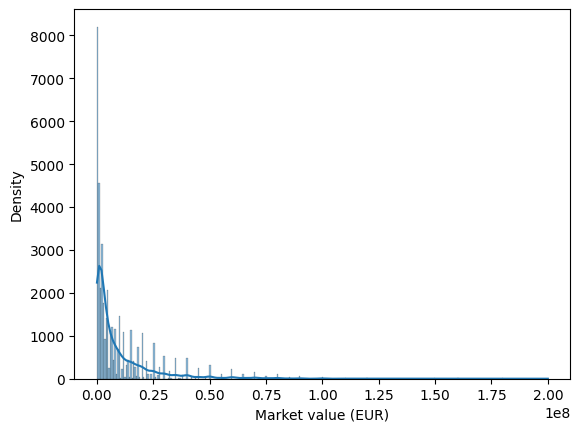

In [8]:
import seaborn as sb
import matplotlib.pyplot as plt
from scipy.stats import norm

market_value = df_all["market_value_on_valuation_date"]

sb.histplot(market_value, kde=True)
plt.xlabel('Market value (EUR)')
plt.ylabel('Density')
plt.show()


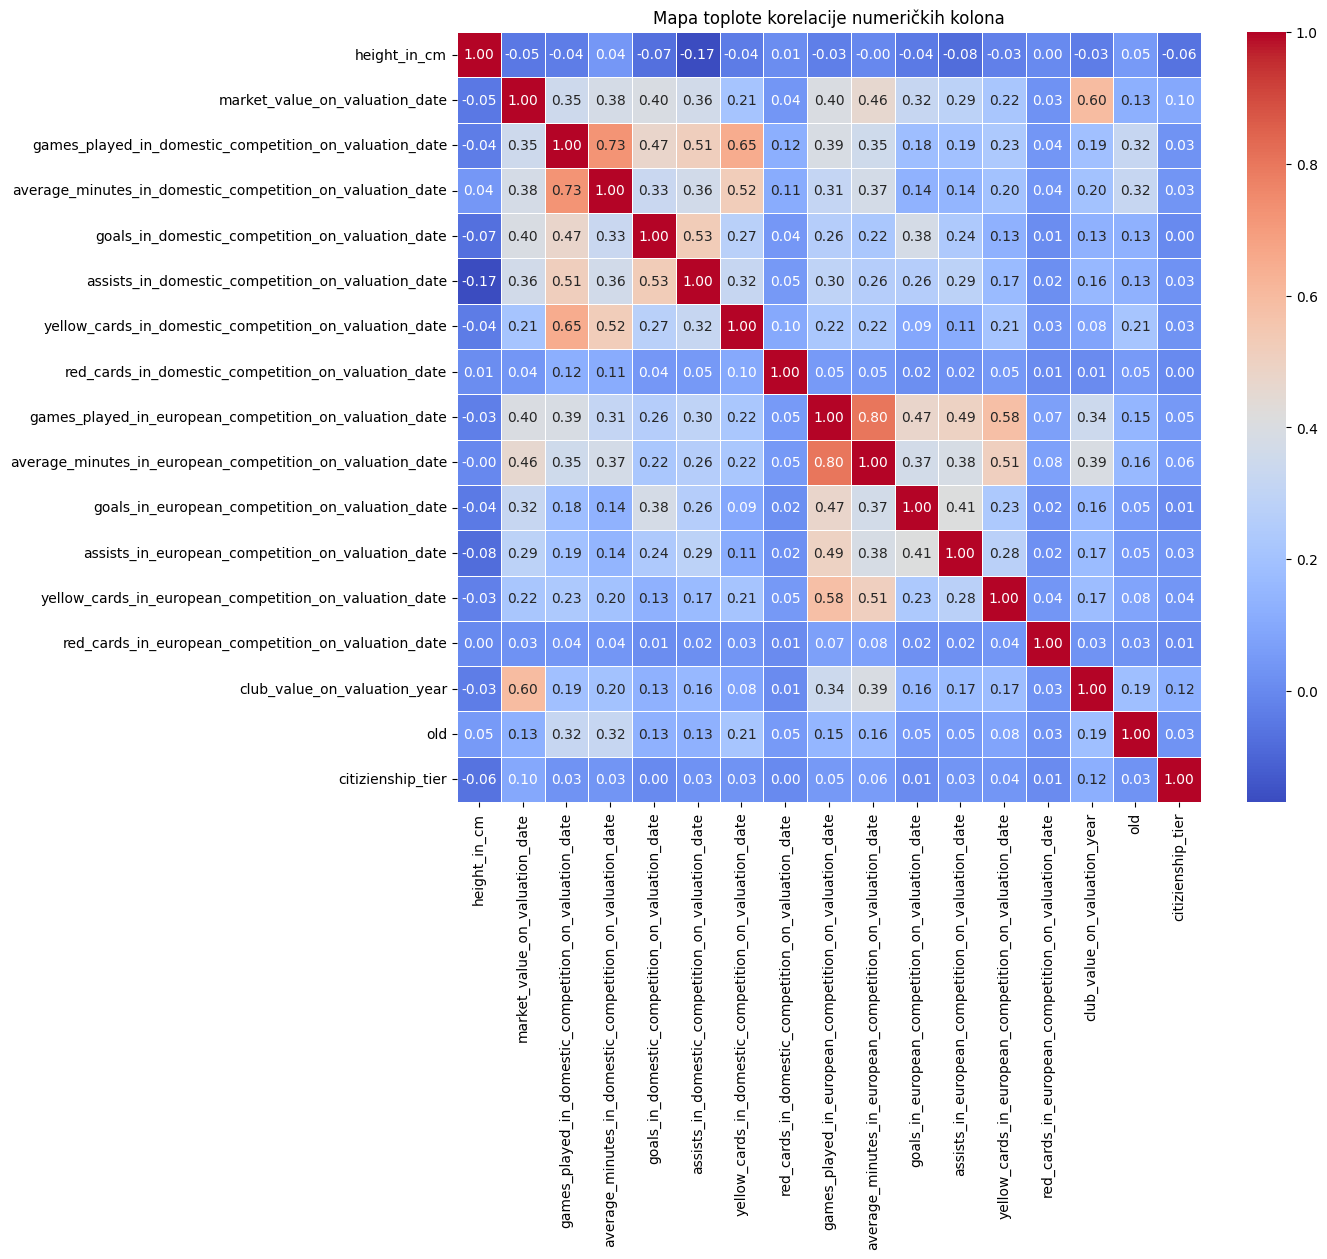

In [11]:
numeričke_kolone = df_all.select_dtypes(include=['float64', 'int64'])

korelacija = numeričke_kolone.corr()

plt.figure(figsize=(12, 10))
sb.heatmap(korelacija, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Mapa toplote korelacije numeričkih kolona')
plt.show()

In [12]:
numeričke_kolone = df_all.select_dtypes(include=['float64', 'int64'])

korelacija = numeričke_kolone.corr()

jaca_korelacija = (korelacija.abs() > 0.7) & (korelacija.abs() < 1)

jaci_parovi = {}

for kolona in jaca_korelacija.columns:
    jaci_parovi[kolona] = list(jaca_korelacija.index[jaca_korelacija[kolona]])

for kolona, korelirane_kolone in jaci_parovi.items():
    if korelirane_kolone:
        print(f"Par korelisanih obeležja za '{kolona}': {korelirane_kolone}")


Par korelisanih obeležja za 'games_played_in_domestic_competition_on_valuation_date': ['average_minutes_in_domestic_competition_on_valuation_date']
Par korelisanih obeležja za 'average_minutes_in_domestic_competition_on_valuation_date': ['games_played_in_domestic_competition_on_valuation_date']
Par korelisanih obeležja za 'games_played_in_european_competition_on_valuation_date': ['average_minutes_in_european_competition_on_valuation_date']
Par korelisanih obeležja za 'average_minutes_in_european_competition_on_valuation_date': ['games_played_in_european_competition_on_valuation_date']


In [28]:
df_all["first_name"].nunique()
df_all.nunique()

valuation_date                                               1678
player_id                                                    2431
first_name                                                   1277
last_name                                                    2180
date_of_birth                                                1959
height_in_cm                                                   41
citizienship                                                  105
position                                                        4
sub_position                                                   13
foot                                                            3
current_club_name                                              96
current_club_domestic_competition                               5
contract_expiration_date                                       11
agent_name                                                    519
market_value_on_valuation_date                                200
games_play

In [30]:
df_all.isna().sum()

valuation_date                                                   0
player_id                                                        0
first_name                                                    2023
last_name                                                        0
date_of_birth                                                    0
height_in_cm                                                     0
citizienship                                                     0
position                                                         0
sub_position                                                     0
foot                                                             0
current_club_name                                                0
current_club_domestic_competition                                0
contract_expiration_date                                      1166
agent_name                                                   11408
market_value_on_valuation_date                                

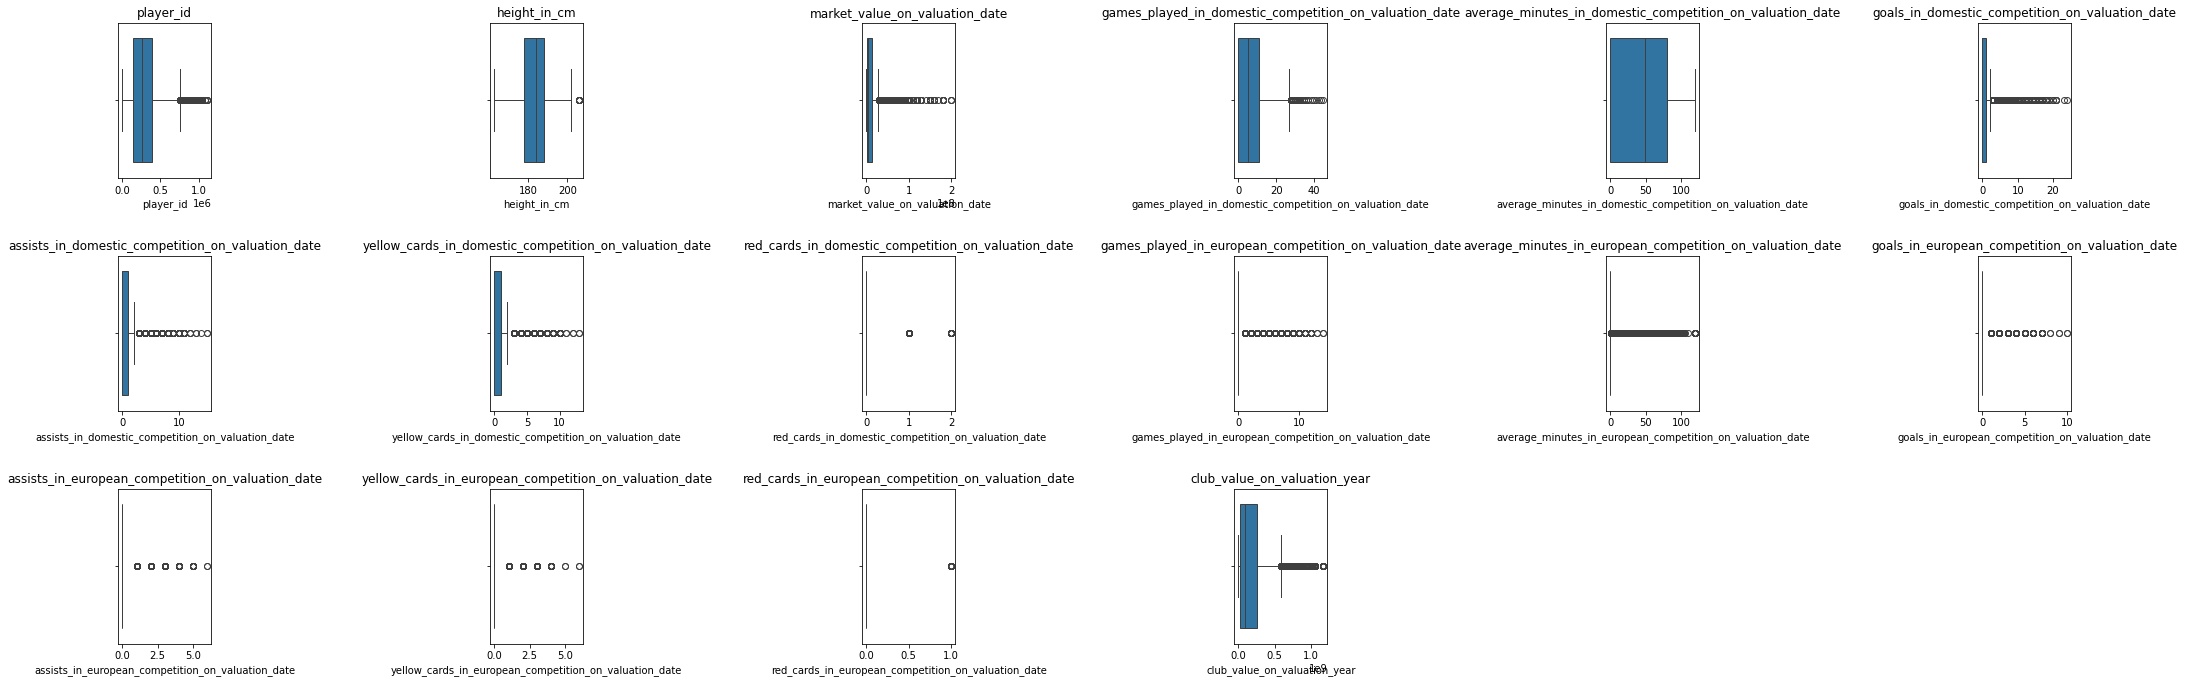

In [4]:
import seaborn as sb
import matplotlib.pyplot as plt

numeričke_kolone = df_all.select_dtypes(include=['float64', 'int64'])

broj_redova = 5
broj_kolona = 6
plt.figure(figsize=(35, 20))

for i, kolona in enumerate(numeričke_kolone.columns, 1):
    plt.subplot(broj_redova, broj_kolona, i)
    sb.boxplot(x=df_all[kolona])
    plt.title(kolona)

plt.subplots_adjust(hspace=0.5, wspace=3)

plt.show()

In [13]:
nedostajuce_vrednosti = df_all.isna().sum()

ukupan_broj_vrednosti = df_all.count()

procenat_nedostajucih = (nedostajuce_vrednosti / ukupan_broj_vrednosti) * 100

print("Procenat nedostajućih vrednosti po koloni:")
print(procenat_nedostajucih)

Procenat nedostajućih vrednosti po koloni:
valuation_date                                               0.0
height_in_cm                                                 0.0
position                                                     0.0
sub_position                                                 0.0
foot                                                         0.0
market_value_on_valuation_date                               0.0
games_played_in_domestic_competition_on_valuation_date       0.0
average_minutes_in_domestic_competition_on_valuation_date    0.0
goals_in_domestic_competition_on_valuation_date              0.0
assists_in_domestic_competition_on_valuation_date            0.0
yellow_cards_in_domestic_competition_on_valuation_date       0.0
red_cards_in_domestic_competition_on_valuation_date          0.0
games_played_in_european_competition_on_valuation_date       0.0
average_minutes_in_european_competition_on_valuation_date    0.0
goals_in_european_competition_on_valuation_date

In [3]:
df_all = pd.read_csv("all_data.csv")

df_all.head()

df_all = df_all.drop(["player_id", "first_name", "last_name", "agent_name", "contract_expiration_date", "current_club_name", "current_club_domestic_competition", "club_name_on_valuation_date"], axis = 1) # player_id, club_domestic_competition_on_valuation_date

In [4]:
df_all.shape

(42026, 22)

In [5]:
df_all.tail(20)

from dateutil.relativedelta import relativedelta

df_all['date_of_birth'] = pd.to_datetime(df_all['date_of_birth'])
df_all['valuation_date'] = pd.to_datetime(df_all['valuation_date'])

df_all['old'] = df_all.apply(lambda row: relativedelta(row['valuation_date'], row['date_of_birth']).years, axis=1)

df_all

,valuation_date,date_of_birth,height_in_cm,citizienship,position,sub_position,foot,market_value_on_valuation_date,games_played_in_domestic_competition_on_valuation_date,average_minutes_in_domestic_competition_on_valuation_date,...,red_cards_in_domestic_competition_on_valuation_date,games_played_in_european_competition_on_valuation_date,average_minutes_in_european_competition_on_valuation_date,goals_in_european_competition_on_valuation_date,assists_in_european_competition_on_valuation_date,yellow_cards_in_european_competition_on_valuation_date,red_cards_in_european_competition_on_valuation_date,club_domestic_competition_on_valuation_date,club_value_on_valuation_year,old
0,2013-01-28,1986-01-04,175.0,England,Midfield,Central Midfield,right,17000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GB1,74000000.0,27
1,2013-07-02,1986-01-04,175.0,England,Midfield,Central Midfield,right,18000000,18.0,69.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GB1,74000000.0,27
2,2014-01-15,1986-01-04,175.0,England,Midfield,Central Midfield,right,15000000,21.0,43.000000,...,0.0,5.0,53.6,1.0,3.0,3.0,0.0,GB1,99000000.0,28
3,2014-08-12,1986-01-04,175.0,England,Midfield,Central Midfield,right,14000000,15.0,52.866667,...,0.0,1.0,90.0,0.0,0.0,0.0,0.0,GB1,99000000.0,28
4,2015-02-12,1986-01-04,175.0,England,Midfield,Central Midfield,right,14000000,24.0,59.333333,...,0.0,6.0,69.0,1.0,0.0,0.0,0.0,GB1,164750000.0,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42021,2021-06-07,1997-06-17,192.0,Cote d'Ivoire,Defender,Centre-Back,right,1200000,3.0,86.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BE1,1212500.0,23
42022,2021-10-06,1997-06-17,192.0,Cote d'Ivoire,Defender,Centre-Back,right,2200000,9.0,88.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BE1,1212500.0,24
42023,2022-01-06,1997-06-17,192.0,Cote d'Ivoire,Defender,Centre-Back,right,3000000,11.0,84.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BE1,2750000.0,24
42024,2022-04-12,1997-06-17,192.0,Cote d'Ivoire,Defender,Centre-Back,right,2500000,13.0,89.538462,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BE1,2750000.0,24


In [6]:
df_all = df_all.drop(["date_of_birth"], axis = 1)

In [7]:
df_all

,valuation_date,height_in_cm,citizienship,position,sub_position,foot,market_value_on_valuation_date,games_played_in_domestic_competition_on_valuation_date,average_minutes_in_domestic_competition_on_valuation_date,goals_in_domestic_competition_on_valuation_date,...,red_cards_in_domestic_competition_on_valuation_date,games_played_in_european_competition_on_valuation_date,average_minutes_in_european_competition_on_valuation_date,goals_in_european_competition_on_valuation_date,assists_in_european_competition_on_valuation_date,yellow_cards_in_european_competition_on_valuation_date,red_cards_in_european_competition_on_valuation_date,club_domestic_competition_on_valuation_date,club_value_on_valuation_year,old
0,2013-01-28,175.0,England,Midfield,Central Midfield,right,17000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GB1,74000000.0,27
1,2013-07-02,175.0,England,Midfield,Central Midfield,right,18000000,18.0,69.000000,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GB1,74000000.0,27
2,2014-01-15,175.0,England,Midfield,Central Midfield,right,15000000,21.0,43.000000,1.0,...,0.0,5.0,53.6,1.0,3.0,3.0,0.0,GB1,99000000.0,28
3,2014-08-12,175.0,England,Midfield,Central Midfield,right,14000000,15.0,52.866667,0.0,...,0.0,1.0,90.0,0.0,0.0,0.0,0.0,GB1,99000000.0,28
4,2015-02-12,175.0,England,Midfield,Central Midfield,right,14000000,24.0,59.333333,4.0,...,0.0,6.0,69.0,1.0,0.0,0.0,0.0,GB1,164750000.0,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42021,2021-06-07,192.0,Cote d'Ivoire,Defender,Centre-Back,right,1200000,3.0,86.666667,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BE1,1212500.0,23
42022,2021-10-06,192.0,Cote d'Ivoire,Defender,Centre-Back,right,2200000,9.0,88.666667,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BE1,1212500.0,24
42023,2022-01-06,192.0,Cote d'Ivoire,Defender,Centre-Back,right,3000000,11.0,84.000000,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BE1,2750000.0,24
42024,2022-04-12,192.0,Cote d'Ivoire,Defender,Centre-Back,right,2500000,13.0,89.538462,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BE1,2750000.0,24


In [8]:
df_all.shape

(42026, 22)

In [9]:
df_all

,valuation_date,height_in_cm,citizienship,position,sub_position,foot,market_value_on_valuation_date,games_played_in_domestic_competition_on_valuation_date,average_minutes_in_domestic_competition_on_valuation_date,goals_in_domestic_competition_on_valuation_date,...,red_cards_in_domestic_competition_on_valuation_date,games_played_in_european_competition_on_valuation_date,average_minutes_in_european_competition_on_valuation_date,goals_in_european_competition_on_valuation_date,assists_in_european_competition_on_valuation_date,yellow_cards_in_european_competition_on_valuation_date,red_cards_in_european_competition_on_valuation_date,club_domestic_competition_on_valuation_date,club_value_on_valuation_year,old
0,2013-01-28,175.0,England,Midfield,Central Midfield,right,17000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GB1,74000000.0,27
1,2013-07-02,175.0,England,Midfield,Central Midfield,right,18000000,18.0,69.000000,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GB1,74000000.0,27
2,2014-01-15,175.0,England,Midfield,Central Midfield,right,15000000,21.0,43.000000,1.0,...,0.0,5.0,53.6,1.0,3.0,3.0,0.0,GB1,99000000.0,28
3,2014-08-12,175.0,England,Midfield,Central Midfield,right,14000000,15.0,52.866667,0.0,...,0.0,1.0,90.0,0.0,0.0,0.0,0.0,GB1,99000000.0,28
4,2015-02-12,175.0,England,Midfield,Central Midfield,right,14000000,24.0,59.333333,4.0,...,0.0,6.0,69.0,1.0,0.0,0.0,0.0,GB1,164750000.0,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42021,2021-06-07,192.0,Cote d'Ivoire,Defender,Centre-Back,right,1200000,3.0,86.666667,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BE1,1212500.0,23
42022,2021-10-06,192.0,Cote d'Ivoire,Defender,Centre-Back,right,2200000,9.0,88.666667,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BE1,1212500.0,24
42023,2022-01-06,192.0,Cote d'Ivoire,Defender,Centre-Back,right,3000000,11.0,84.000000,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BE1,2750000.0,24
42024,2022-04-12,192.0,Cote d'Ivoire,Defender,Centre-Back,right,2500000,13.0,89.538462,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BE1,2750000.0,24


In [10]:
indexAge = df_all[df_all["citizienship"] == "Kosovo"].index
df_all = df_all.drop(indexAge)
df_all

,valuation_date,height_in_cm,citizienship,position,sub_position,foot,market_value_on_valuation_date,games_played_in_domestic_competition_on_valuation_date,average_minutes_in_domestic_competition_on_valuation_date,goals_in_domestic_competition_on_valuation_date,...,red_cards_in_domestic_competition_on_valuation_date,games_played_in_european_competition_on_valuation_date,average_minutes_in_european_competition_on_valuation_date,goals_in_european_competition_on_valuation_date,assists_in_european_competition_on_valuation_date,yellow_cards_in_european_competition_on_valuation_date,red_cards_in_european_competition_on_valuation_date,club_domestic_competition_on_valuation_date,club_value_on_valuation_year,old
0,2013-01-28,175.0,England,Midfield,Central Midfield,right,17000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GB1,74000000.0,27
1,2013-07-02,175.0,England,Midfield,Central Midfield,right,18000000,18.0,69.000000,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GB1,74000000.0,27
2,2014-01-15,175.0,England,Midfield,Central Midfield,right,15000000,21.0,43.000000,1.0,...,0.0,5.0,53.6,1.0,3.0,3.0,0.0,GB1,99000000.0,28
3,2014-08-12,175.0,England,Midfield,Central Midfield,right,14000000,15.0,52.866667,0.0,...,0.0,1.0,90.0,0.0,0.0,0.0,0.0,GB1,99000000.0,28
4,2015-02-12,175.0,England,Midfield,Central Midfield,right,14000000,24.0,59.333333,4.0,...,0.0,6.0,69.0,1.0,0.0,0.0,0.0,GB1,164750000.0,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42021,2021-06-07,192.0,Cote d'Ivoire,Defender,Centre-Back,right,1200000,3.0,86.666667,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BE1,1212500.0,23
42022,2021-10-06,192.0,Cote d'Ivoire,Defender,Centre-Back,right,2200000,9.0,88.666667,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BE1,1212500.0,24
42023,2022-01-06,192.0,Cote d'Ivoire,Defender,Centre-Back,right,3000000,11.0,84.000000,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BE1,2750000.0,24
42024,2022-04-12,192.0,Cote d'Ivoire,Defender,Centre-Back,right,2500000,13.0,89.538462,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BE1,2750000.0,24


In [11]:
lista = sorted(df_all["citizienship"].unique())
print(lista)

['Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Belgium', 'Benin', 'Bosnia-Herzegovina', 'Brazil', 'Burkina Faso', 'Burundi', 'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic', 'Chile', 'Colombia', 'Congo', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cyprus', 'Czech Republic', 'DR Congo', 'Denmark', 'Dominican Republic', 'Ecuador', 'Egypt', 'England', 'Equatorial Guinea', 'Estonia', 'Finland', 'France', 'French Guiana', 'Gabon', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guadeloupe', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'Iran', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kenya', 'Korea, South', 'Lithuania', 'Luxembourg', 'Mali', 'Malta', 'Martinique', 'Mexico', 'Montenegro', 'Morocco', 'Mozambique', 'Netherlands', 'New Zealand', 'Nigeria', 'North Macedonia', 'Northern Ireland', 'Norway', 'Panama', 'Paraguay', 'Peru', 'Poland', 'Portugal', 'Romania', 'Russia', 'Réunion', 'Scotland',

In [12]:
df_all["citizienship"].unique()

citizienship_tier_5 = ["Argentina", "France", "England", "Belgium", "Brazil", "Netherlands", "Portugal", "Spain", "Italy", "Croatia"]
citizienship_tier_4 = ["Uruguay", "United States", "Morocco", "Colombia", "Mexico", "Germany", "Japan", 'Switzerland', 'Denmark', 'Senegal', 'Iran', 'Ukraine', 'Korea, South', 'Austria', 'Australia']
citizienship_tier_3 = ['Sweden', 'Hungary', 'Tunisia', 'Wales', 'Algeria', 'Poland', 'Ecuador', 'Egypt', 'Serbia', 'Peru', 'Scotland', 'Turkey', 'Russia', 'Czech Republic', 'Chile']
citizienship_tier_2 = ['Panama', 'Nigeria', 'Romania', 'Norway', 'Slovakia', 'Cameroon', 'Greece', 'Canada', "Cote d'Ivoire", 'Venezuela', 'Mali', 'Costa Rica', 'Paraguay', 'Slovenia', 'Jamaica', 'Burkina Faso', 'Finland', 'Ireland', 'Ghana', 'Albania', 'North Macedonia', 'South Africa', 'DR Congo', 'Uzbekistan', 'Bosnia-Herzegovina', 'Montenegro', 'Iceland', 'Northern Ireland', 'Cape Verde', 'Israel']
citizienship_tier_1 = ["Georgia", 'Angola', 'Armenia', 'Benin', 'Burundi', 'Central African Republic', 'Congo', 'Cyprus', 'Dominican Republic', 'Equatorial Guinea', 'Estonia', 'French Guiana', 'Gabon', 'Grenada', 'Guadeloupe', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Honduras', 'Jordan', 'Kenya', 'Lithuania', 'Luxembourg', 'Malta', 'Martinique', 'Mozambique', 'New Zealand', 'Réunion', 'Sierra Leone', 'Suriname','The Gambia', 'Togo', 'Zambia', 'Zimbabwe']


print(len(citizienship_tier_1))

print(len(citizienship_tier_2))

print(len(citizienship_tier_3))

print(len(citizienship_tier_4))

print(len(citizienship_tier_5))

34
30
15
15
10


In [13]:
value_mapping = {}

for country in citizienship_tier_1:
    value_mapping[country] = 1

for country in citizienship_tier_2:
    value_mapping[country] = 2

for country in citizienship_tier_3:
    value_mapping[country] = 3

for country in citizienship_tier_4:
    value_mapping[country] = 4

for country in citizienship_tier_5:
    value_mapping[country] = 5

df_all['citizienship_tier'] = df_all['citizienship'].map(value_mapping)

print(value_mapping)

{'Georgia': 1, 'Angola': 1, 'Armenia': 1, 'Benin': 1, 'Burundi': 1, 'Central African Republic': 1, 'Congo': 1, 'Cyprus': 1, 'Dominican Republic': 1, 'Equatorial Guinea': 1, 'Estonia': 1, 'French Guiana': 1, 'Gabon': 1, 'Grenada': 1, 'Guadeloupe': 1, 'Guinea': 1, 'Guinea-Bissau': 1, 'Haiti': 1, 'Honduras': 1, 'Jordan': 1, 'Kenya': 1, 'Lithuania': 1, 'Luxembourg': 1, 'Malta': 1, 'Martinique': 1, 'Mozambique': 1, 'New Zealand': 1, 'Réunion': 1, 'Sierra Leone': 1, 'Suriname': 1, 'The Gambia': 1, 'Togo': 1, 'Zambia': 1, 'Zimbabwe': 1, 'Panama': 2, 'Nigeria': 2, 'Romania': 2, 'Norway': 2, 'Slovakia': 2, 'Cameroon': 2, 'Greece': 2, 'Canada': 2, "Cote d'Ivoire": 2, 'Venezuela': 2, 'Mali': 2, 'Costa Rica': 2, 'Paraguay': 2, 'Slovenia': 2, 'Jamaica': 2, 'Burkina Faso': 2, 'Finland': 2, 'Ireland': 2, 'Ghana': 2, 'Albania': 2, 'North Macedonia': 2, 'South Africa': 2, 'DR Congo': 2, 'Uzbekistan': 2, 'Bosnia-Herzegovina': 2, 'Montenegro': 2, 'Iceland': 2, 'Northern Ireland': 2, 'Cape Verde': 2, 'Isr

In [14]:
df_all

,valuation_date,height_in_cm,citizienship,position,sub_position,foot,market_value_on_valuation_date,games_played_in_domestic_competition_on_valuation_date,average_minutes_in_domestic_competition_on_valuation_date,goals_in_domestic_competition_on_valuation_date,...,games_played_in_european_competition_on_valuation_date,average_minutes_in_european_competition_on_valuation_date,goals_in_european_competition_on_valuation_date,assists_in_european_competition_on_valuation_date,yellow_cards_in_european_competition_on_valuation_date,red_cards_in_european_competition_on_valuation_date,club_domestic_competition_on_valuation_date,club_value_on_valuation_year,old,citizienship_tier
0,2013-01-28,175.0,England,Midfield,Central Midfield,right,17000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,GB1,74000000.0,27,5
1,2013-07-02,175.0,England,Midfield,Central Midfield,right,18000000,18.0,69.000000,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,GB1,74000000.0,27,5
2,2014-01-15,175.0,England,Midfield,Central Midfield,right,15000000,21.0,43.000000,1.0,...,5.0,53.6,1.0,3.0,3.0,0.0,GB1,99000000.0,28,5
3,2014-08-12,175.0,England,Midfield,Central Midfield,right,14000000,15.0,52.866667,0.0,...,1.0,90.0,0.0,0.0,0.0,0.0,GB1,99000000.0,28,5
4,2015-02-12,175.0,England,Midfield,Central Midfield,right,14000000,24.0,59.333333,4.0,...,6.0,69.0,1.0,0.0,0.0,0.0,GB1,164750000.0,29,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42021,2021-06-07,192.0,Cote d'Ivoire,Defender,Centre-Back,right,1200000,3.0,86.666667,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,BE1,1212500.0,23,2
42022,2021-10-06,192.0,Cote d'Ivoire,Defender,Centre-Back,right,2200000,9.0,88.666667,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,BE1,1212500.0,24,2
42023,2022-01-06,192.0,Cote d'Ivoire,Defender,Centre-Back,right,3000000,11.0,84.000000,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,BE1,2750000.0,24,2
42024,2022-04-12,192.0,Cote d'Ivoire,Defender,Centre-Back,right,2500000,13.0,89.538462,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,BE1,2750000.0,24,2


In [15]:
df_all = df_all.drop(["citizienship"], axis = 1)

In [16]:
df_all

,valuation_date,height_in_cm,position,sub_position,foot,market_value_on_valuation_date,games_played_in_domestic_competition_on_valuation_date,average_minutes_in_domestic_competition_on_valuation_date,goals_in_domestic_competition_on_valuation_date,assists_in_domestic_competition_on_valuation_date,...,games_played_in_european_competition_on_valuation_date,average_minutes_in_european_competition_on_valuation_date,goals_in_european_competition_on_valuation_date,assists_in_european_competition_on_valuation_date,yellow_cards_in_european_competition_on_valuation_date,red_cards_in_european_competition_on_valuation_date,club_domestic_competition_on_valuation_date,club_value_on_valuation_year,old,citizienship_tier
0,2013-01-28,175.0,Midfield,Central Midfield,right,17000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,GB1,74000000.0,27,5
1,2013-07-02,175.0,Midfield,Central Midfield,right,18000000,18.0,69.000000,1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,GB1,74000000.0,27,5
2,2014-01-15,175.0,Midfield,Central Midfield,right,15000000,21.0,43.000000,1.0,3.0,...,5.0,53.6,1.0,3.0,3.0,0.0,GB1,99000000.0,28,5
3,2014-08-12,175.0,Midfield,Central Midfield,right,14000000,15.0,52.866667,0.0,4.0,...,1.0,90.0,0.0,0.0,0.0,0.0,GB1,99000000.0,28,5
4,2015-02-12,175.0,Midfield,Central Midfield,right,14000000,24.0,59.333333,4.0,7.0,...,6.0,69.0,1.0,0.0,0.0,0.0,GB1,164750000.0,29,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42021,2021-06-07,192.0,Defender,Centre-Back,right,1200000,3.0,86.666667,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,BE1,1212500.0,23,2
42022,2021-10-06,192.0,Defender,Centre-Back,right,2200000,9.0,88.666667,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,BE1,1212500.0,24,2
42023,2022-01-06,192.0,Defender,Centre-Back,right,3000000,11.0,84.000000,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,BE1,2750000.0,24,2
42024,2022-04-12,192.0,Defender,Centre-Back,right,2500000,13.0,89.538462,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,BE1,2750000.0,24,2


In [17]:
df_all.to_csv("all_data_new.csv", index = False)
df_all.dtypes
df_all.shape

(41873, 22)

In [18]:
df_all = pd.read_csv("all_data_new.csv")

In [19]:
df_all

,valuation_date,height_in_cm,position,sub_position,foot,market_value_on_valuation_date,games_played_in_domestic_competition_on_valuation_date,average_minutes_in_domestic_competition_on_valuation_date,goals_in_domestic_competition_on_valuation_date,assists_in_domestic_competition_on_valuation_date,...,games_played_in_european_competition_on_valuation_date,average_minutes_in_european_competition_on_valuation_date,goals_in_european_competition_on_valuation_date,assists_in_european_competition_on_valuation_date,yellow_cards_in_european_competition_on_valuation_date,red_cards_in_european_competition_on_valuation_date,club_domestic_competition_on_valuation_date,club_value_on_valuation_year,old,citizienship_tier
0,2013-01-28,175.0,Midfield,Central Midfield,right,17000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,GB1,74000000.0,27,5
1,2013-07-02,175.0,Midfield,Central Midfield,right,18000000,18.0,69.000000,1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,GB1,74000000.0,27,5
2,2014-01-15,175.0,Midfield,Central Midfield,right,15000000,21.0,43.000000,1.0,3.0,...,5.0,53.6,1.0,3.0,3.0,0.0,GB1,99000000.0,28,5
3,2014-08-12,175.0,Midfield,Central Midfield,right,14000000,15.0,52.866667,0.0,4.0,...,1.0,90.0,0.0,0.0,0.0,0.0,GB1,99000000.0,28,5
4,2015-02-12,175.0,Midfield,Central Midfield,right,14000000,24.0,59.333333,4.0,7.0,...,6.0,69.0,1.0,0.0,0.0,0.0,GB1,164750000.0,29,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41868,2021-06-07,192.0,Defender,Centre-Back,right,1200000,3.0,86.666667,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,BE1,1212500.0,23,2
41869,2021-10-06,192.0,Defender,Centre-Back,right,2200000,9.0,88.666667,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,BE1,1212500.0,24,2
41870,2022-01-06,192.0,Defender,Centre-Back,right,3000000,11.0,84.000000,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,BE1,2750000.0,24,2
41871,2022-04-12,192.0,Defender,Centre-Back,right,2500000,13.0,89.538462,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,BE1,2750000.0,24,2


In [20]:
from dateutil.relativedelta import relativedelta

df_all['valuation_date'] = pd.to_datetime(df_all['valuation_date'])

df_all.dtypes

valuation_date                                               datetime64[ns]
height_in_cm                                                        float64
position                                                             object
sub_position                                                         object
foot                                                                 object
market_value_on_valuation_date                                        int64
games_played_in_domestic_competition_on_valuation_date              float64
average_minutes_in_domestic_competition_on_valuation_date           float64
goals_in_domestic_competition_on_valuation_date                     float64
assists_in_domestic_competition_on_valuation_date                   float64
yellow_cards_in_domestic_competition_on_valuation_date              float64
red_cards_in_domestic_competition_on_valuation_date                 float64
games_played_in_european_competition_on_valuation_date              float64
average_minu

In [21]:
df_all.shape

(41873, 22)

In [22]:
df_all

,valuation_date,height_in_cm,position,sub_position,foot,market_value_on_valuation_date,games_played_in_domestic_competition_on_valuation_date,average_minutes_in_domestic_competition_on_valuation_date,goals_in_domestic_competition_on_valuation_date,assists_in_domestic_competition_on_valuation_date,...,games_played_in_european_competition_on_valuation_date,average_minutes_in_european_competition_on_valuation_date,goals_in_european_competition_on_valuation_date,assists_in_european_competition_on_valuation_date,yellow_cards_in_european_competition_on_valuation_date,red_cards_in_european_competition_on_valuation_date,club_domestic_competition_on_valuation_date,club_value_on_valuation_year,old,citizienship_tier
0,2013-01-28,175.0,Midfield,Central Midfield,right,17000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,GB1,74000000.0,27,5
1,2013-07-02,175.0,Midfield,Central Midfield,right,18000000,18.0,69.000000,1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,GB1,74000000.0,27,5
2,2014-01-15,175.0,Midfield,Central Midfield,right,15000000,21.0,43.000000,1.0,3.0,...,5.0,53.6,1.0,3.0,3.0,0.0,GB1,99000000.0,28,5
3,2014-08-12,175.0,Midfield,Central Midfield,right,14000000,15.0,52.866667,0.0,4.0,...,1.0,90.0,0.0,0.0,0.0,0.0,GB1,99000000.0,28,5
4,2015-02-12,175.0,Midfield,Central Midfield,right,14000000,24.0,59.333333,4.0,7.0,...,6.0,69.0,1.0,0.0,0.0,0.0,GB1,164750000.0,29,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41868,2021-06-07,192.0,Defender,Centre-Back,right,1200000,3.0,86.666667,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,BE1,1212500.0,23,2
41869,2021-10-06,192.0,Defender,Centre-Back,right,2200000,9.0,88.666667,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,BE1,1212500.0,24,2
41870,2022-01-06,192.0,Defender,Centre-Back,right,3000000,11.0,84.000000,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,BE1,2750000.0,24,2
41871,2022-04-12,192.0,Defender,Centre-Back,right,2500000,13.0,89.538462,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,BE1,2750000.0,24,2


In [23]:
df_all["club_domestic_competition_on_valuation_date"].unique()

club_domestic_competition_on_valuation_date_tier_3 = ["GB1", "IT1", "ES1", "FR1", "L1"]
club_domestic_competition_on_valuation_date_tier_2 = ["PO1", "RU1", "TR1", "NL1", "BE1"]
club_domestic_competition_on_valuation_date_tier_1 = ['UKR1', 'SC1', 'GR1', 'DK1']

In [24]:
value_mapping = {}

for domestic_competition in club_domestic_competition_on_valuation_date_tier_1:
    value_mapping[domestic_competition] = 1

for domestic_competition in club_domestic_competition_on_valuation_date_tier_2:
    value_mapping[domestic_competition] = 2

for domestic_competition in club_domestic_competition_on_valuation_date_tier_3:
    value_mapping[domestic_competition] = 3

df_all['club_domestic_competition_on_valuation_date_tier'] = df_all['club_domestic_competition_on_valuation_date'].map(value_mapping)

print(value_mapping)

{'UKR1': 1, 'SC1': 1, 'GR1': 1, 'DK1': 1, 'PO1': 2, 'RU1': 2, 'TR1': 2, 'NL1': 2, 'BE1': 2, 'GB1': 3, 'IT1': 3, 'ES1': 3, 'FR1': 3, 'L1': 3}


In [25]:
df_all

,valuation_date,height_in_cm,position,sub_position,foot,market_value_on_valuation_date,games_played_in_domestic_competition_on_valuation_date,average_minutes_in_domestic_competition_on_valuation_date,goals_in_domestic_competition_on_valuation_date,assists_in_domestic_competition_on_valuation_date,...,average_minutes_in_european_competition_on_valuation_date,goals_in_european_competition_on_valuation_date,assists_in_european_competition_on_valuation_date,yellow_cards_in_european_competition_on_valuation_date,red_cards_in_european_competition_on_valuation_date,club_domestic_competition_on_valuation_date,club_value_on_valuation_year,old,citizienship_tier,club_domestic_competition_on_valuation_date_tier
0,2013-01-28,175.0,Midfield,Central Midfield,right,17000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,GB1,74000000.0,27,5,3
1,2013-07-02,175.0,Midfield,Central Midfield,right,18000000,18.0,69.000000,1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,GB1,74000000.0,27,5,3
2,2014-01-15,175.0,Midfield,Central Midfield,right,15000000,21.0,43.000000,1.0,3.0,...,53.6,1.0,3.0,3.0,0.0,GB1,99000000.0,28,5,3
3,2014-08-12,175.0,Midfield,Central Midfield,right,14000000,15.0,52.866667,0.0,4.0,...,90.0,0.0,0.0,0.0,0.0,GB1,99000000.0,28,5,3
4,2015-02-12,175.0,Midfield,Central Midfield,right,14000000,24.0,59.333333,4.0,7.0,...,69.0,1.0,0.0,0.0,0.0,GB1,164750000.0,29,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41868,2021-06-07,192.0,Defender,Centre-Back,right,1200000,3.0,86.666667,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,BE1,1212500.0,23,2,2
41869,2021-10-06,192.0,Defender,Centre-Back,right,2200000,9.0,88.666667,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,BE1,1212500.0,24,2,2
41870,2022-01-06,192.0,Defender,Centre-Back,right,3000000,11.0,84.000000,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,BE1,2750000.0,24,2,2
41871,2022-04-12,192.0,Defender,Centre-Back,right,2500000,13.0,89.538462,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,BE1,2750000.0,24,2,2


In [26]:
df_all = df_all.drop(["club_domestic_competition_on_valuation_date"], axis = 1)

In [27]:
df_all

,valuation_date,height_in_cm,position,sub_position,foot,market_value_on_valuation_date,games_played_in_domestic_competition_on_valuation_date,average_minutes_in_domestic_competition_on_valuation_date,goals_in_domestic_competition_on_valuation_date,assists_in_domestic_competition_on_valuation_date,...,games_played_in_european_competition_on_valuation_date,average_minutes_in_european_competition_on_valuation_date,goals_in_european_competition_on_valuation_date,assists_in_european_competition_on_valuation_date,yellow_cards_in_european_competition_on_valuation_date,red_cards_in_european_competition_on_valuation_date,club_value_on_valuation_year,old,citizienship_tier,club_domestic_competition_on_valuation_date_tier
0,2013-01-28,175.0,Midfield,Central Midfield,right,17000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,74000000.0,27,5,3
1,2013-07-02,175.0,Midfield,Central Midfield,right,18000000,18.0,69.000000,1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,74000000.0,27,5,3
2,2014-01-15,175.0,Midfield,Central Midfield,right,15000000,21.0,43.000000,1.0,3.0,...,5.0,53.6,1.0,3.0,3.0,0.0,99000000.0,28,5,3
3,2014-08-12,175.0,Midfield,Central Midfield,right,14000000,15.0,52.866667,0.0,4.0,...,1.0,90.0,0.0,0.0,0.0,0.0,99000000.0,28,5,3
4,2015-02-12,175.0,Midfield,Central Midfield,right,14000000,24.0,59.333333,4.0,7.0,...,6.0,69.0,1.0,0.0,0.0,0.0,164750000.0,29,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41868,2021-06-07,192.0,Defender,Centre-Back,right,1200000,3.0,86.666667,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1212500.0,23,2,2
41869,2021-10-06,192.0,Defender,Centre-Back,right,2200000,9.0,88.666667,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1212500.0,24,2,2
41870,2022-01-06,192.0,Defender,Centre-Back,right,3000000,11.0,84.000000,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2750000.0,24,2,2
41871,2022-04-12,192.0,Defender,Centre-Back,right,2500000,13.0,89.538462,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2750000.0,24,2,2


In [28]:
df_all["valuation_date"].nunique()

1673

In [29]:
df_all['valuation_date_tertile'] = df_all['valuation_date'].dt.year.astype(str) + '-T' + ((df_all['valuation_date'].dt.month - 1) // 4 + 1).astype(str)

In [30]:
value_mapping = {}

sorted_tertiles = np.sort(df_all['valuation_date_tertile'].unique())

i = 1
for tertile in sorted_tertiles:
    value_mapping[tertile] = i
    i += 1

value_mapping

{'2012-T2': 1,
 '2012-T3': 2,
 '2013-T1': 3,
 '2013-T2': 4,
 '2013-T3': 5,
 '2014-T1': 6,
 '2014-T2': 7,
 '2014-T3': 8,
 '2015-T1': 9,
 '2015-T2': 10,
 '2015-T3': 11,
 '2016-T1': 12,
 '2016-T2': 13,
 '2016-T3': 14,
 '2017-T1': 15,
 '2017-T2': 16,
 '2017-T3': 17,
 '2018-T1': 18,
 '2018-T2': 19,
 '2018-T3': 20,
 '2019-T1': 21,
 '2019-T2': 22,
 '2019-T3': 23,
 '2020-T1': 24,
 '2020-T2': 25,
 '2020-T3': 26,
 '2021-T1': 27,
 '2021-T2': 28,
 '2021-T3': 29,
 '2022-T1': 30,
 '2022-T2': 31,
 '2022-T3': 32,
 '2023-T1': 33,
 '2023-T2': 34,
 '2023-T3': 35}

In [31]:
df_all_copy = df_all

df_all['valuation_date'] = df_all['valuation_date_tertile'].map(value_mapping)

df_all

,valuation_date,height_in_cm,position,sub_position,foot,market_value_on_valuation_date,games_played_in_domestic_competition_on_valuation_date,average_minutes_in_domestic_competition_on_valuation_date,goals_in_domestic_competition_on_valuation_date,assists_in_domestic_competition_on_valuation_date,...,average_minutes_in_european_competition_on_valuation_date,goals_in_european_competition_on_valuation_date,assists_in_european_competition_on_valuation_date,yellow_cards_in_european_competition_on_valuation_date,red_cards_in_european_competition_on_valuation_date,club_value_on_valuation_year,old,citizienship_tier,club_domestic_competition_on_valuation_date_tier,valuation_date_tertile
0,3,175.0,Midfield,Central Midfield,right,17000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,74000000.0,27,5,3,2013-T1
1,4,175.0,Midfield,Central Midfield,right,18000000,18.0,69.000000,1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,74000000.0,27,5,3,2013-T2
2,6,175.0,Midfield,Central Midfield,right,15000000,21.0,43.000000,1.0,3.0,...,53.6,1.0,3.0,3.0,0.0,99000000.0,28,5,3,2014-T1
3,7,175.0,Midfield,Central Midfield,right,14000000,15.0,52.866667,0.0,4.0,...,90.0,0.0,0.0,0.0,0.0,99000000.0,28,5,3,2014-T2
4,9,175.0,Midfield,Central Midfield,right,14000000,24.0,59.333333,4.0,7.0,...,69.0,1.0,0.0,0.0,0.0,164750000.0,29,5,3,2015-T1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41868,28,192.0,Defender,Centre-Back,right,1200000,3.0,86.666667,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1212500.0,23,2,2,2021-T2
41869,29,192.0,Defender,Centre-Back,right,2200000,9.0,88.666667,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1212500.0,24,2,2,2021-T3
41870,30,192.0,Defender,Centre-Back,right,3000000,11.0,84.000000,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2750000.0,24,2,2,2022-T1
41871,30,192.0,Defender,Centre-Back,right,2500000,13.0,89.538462,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2750000.0,24,2,2,2022-T1


In [32]:
df_all = df_all.drop(["valuation_date_tertile"], axis = 1)

In [33]:
df_all

,valuation_date,height_in_cm,position,sub_position,foot,market_value_on_valuation_date,games_played_in_domestic_competition_on_valuation_date,average_minutes_in_domestic_competition_on_valuation_date,goals_in_domestic_competition_on_valuation_date,assists_in_domestic_competition_on_valuation_date,...,games_played_in_european_competition_on_valuation_date,average_minutes_in_european_competition_on_valuation_date,goals_in_european_competition_on_valuation_date,assists_in_european_competition_on_valuation_date,yellow_cards_in_european_competition_on_valuation_date,red_cards_in_european_competition_on_valuation_date,club_value_on_valuation_year,old,citizienship_tier,club_domestic_competition_on_valuation_date_tier
0,3,175.0,Midfield,Central Midfield,right,17000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,74000000.0,27,5,3
1,4,175.0,Midfield,Central Midfield,right,18000000,18.0,69.000000,1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,74000000.0,27,5,3
2,6,175.0,Midfield,Central Midfield,right,15000000,21.0,43.000000,1.0,3.0,...,5.0,53.6,1.0,3.0,3.0,0.0,99000000.0,28,5,3
3,7,175.0,Midfield,Central Midfield,right,14000000,15.0,52.866667,0.0,4.0,...,1.0,90.0,0.0,0.0,0.0,0.0,99000000.0,28,5,3
4,9,175.0,Midfield,Central Midfield,right,14000000,24.0,59.333333,4.0,7.0,...,6.0,69.0,1.0,0.0,0.0,0.0,164750000.0,29,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41868,28,192.0,Defender,Centre-Back,right,1200000,3.0,86.666667,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1212500.0,23,2,2
41869,29,192.0,Defender,Centre-Back,right,2200000,9.0,88.666667,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1212500.0,24,2,2
41870,30,192.0,Defender,Centre-Back,right,3000000,11.0,84.000000,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2750000.0,24,2,2
41871,30,192.0,Defender,Centre-Back,right,2500000,13.0,89.538462,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2750000.0,24,2,2


In [57]:
df_all['valuation_date_tertile'].min()


'2012-T2'

In [58]:
df_all['valuation_date_tertile'].max() 


'2023-T3'

In [99]:
df_all

,valuation_date,player_id,height_in_cm,position,sub_position,foot,market_value_on_valuation_date,games_played_in_domestic_competition_on_valuation_date,average_minutes_in_domestic_competition_on_valuation_date,goals_in_domestic_competition_on_valuation_date,...,games_played_in_european_competition_on_valuation_date,average_minutes_in_european_competition_on_valuation_date,goals_in_european_competition_on_valuation_date,assists_in_european_competition_on_valuation_date,yellow_cards_in_european_competition_on_valuation_date,red_cards_in_european_competition_on_valuation_date,club_value_on_valuation_year,old,citizienship_tier,club_domestic_competition_on_valuation_date_tier
0,3,3333,175.0,Midfield,Central Midfield,right,17000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,74000000.0,27,5,3
1,4,3333,175.0,Midfield,Central Midfield,right,18000000,18.0,69.000000,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,74000000.0,27,5,3
2,6,3333,175.0,Midfield,Central Midfield,right,15000000,21.0,43.000000,1.0,...,5.0,53.6,1.0,3.0,3.0,0.0,99000000.0,28,5,3
3,7,3333,175.0,Midfield,Central Midfield,right,14000000,15.0,52.866667,0.0,...,1.0,90.0,0.0,0.0,0.0,0.0,99000000.0,28,5,3
4,9,3333,175.0,Midfield,Central Midfield,right,14000000,24.0,59.333333,4.0,...,6.0,69.0,1.0,0.0,0.0,0.0,164750000.0,29,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41868,28,683895,192.0,Defender,Centre-Back,right,1200000,3.0,86.666667,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1212500.0,23,2,2
41869,29,683895,192.0,Defender,Centre-Back,right,2200000,9.0,88.666667,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1212500.0,24,2,2
41870,30,683895,192.0,Defender,Centre-Back,right,3000000,11.0,84.000000,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2750000.0,24,2,2
41871,30,683895,192.0,Defender,Centre-Back,right,2500000,13.0,89.538462,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2750000.0,24,2,2


In [34]:
df_all.shape

(41873, 22)

In [35]:
df_all.to_csv("all_data_new_2.csv", index = False)